# 1. About Dataset
The dataset provided from kaggle (https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset) contains ratings for different categories of interest, presumably for places or activities, by various users. Here's the overview of dataset. 

## 1.1. Context
This data set has been sourced from the Machine Learning Repository of University of California, Irvine (UC Irvine) : Travel Review Ratings Data Set. This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

## 1.2. Content
- Attribute 1 : Unique user id
- Attribute 2 : Average ratings on churches
- Attribute 3 : Average ratings on resorts
- Attribute 4 : Average ratings on beaches
- Attribute 5 : Average ratings on parks
- Attribute 6 : Average ratings on theatres
- Attribute 7 : Average ratings on museums
- Attribute 8 : Average ratings on malls
- Attribute 9 : Average ratings on zoo
- Attribute 10 : Average ratings on restaurants
- Attribute 11 : Average ratings on pubs/bars
- Attribute 12 : Average ratings on local services
- Attribute 13 : Average ratings on burger/pizza shops
- Attribute 14 : Average ratings on hotels/other lodgings
- Attribute 15 : Average ratings on juice bars
- Attribute 16 : Average ratings on art galleries
- Attribute 17 : Average ratings on dance clubs
- Attribute 18 : Average ratings on swimming pools
- Attribute 19 : Average ratings on gyms
- Attribute 20 : Average ratings on bakeries
- Attribute 21 : Average ratings on beauty & spas
- Attribute 22 : Average ratings on cafes
- Attribute 23 : Average ratings on view points
- Attribute 24 : Average ratings on monuments
- Attribute 25 : Average ratings on gardens

# 2. Load data

In [25]:
# Let's first load and inspect the contents of the uploaded CSV file to understand the dataset.
import pandas as pd

# Load the dataset
file_path = './data/google_review_ratings.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

(     User  Category 1  Category 2  Category 3  Category 4  Category 5  \
 0  User 1         0.0         0.0        3.63        3.65         5.0   
 1  User 2         0.0         0.0        3.63        3.65         5.0   
 2  User 3         0.0         0.0        3.63        3.63         5.0   
 3  User 4         0.0         0.5        3.63        3.63         5.0   
 4  User 5         0.0         0.0        3.63        3.63         5.0   
 
    Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
 0        2.92         5.0        2.35        2.33  ...         0.59   
 1        2.92         5.0        2.64        2.33  ...         0.59   
 2        2.92         5.0        2.64        2.33  ...         0.59   
 3        2.92         5.0        2.35        2.33  ...         0.59   
 4        2.92         5.0        2.64        2.33  ...         0.59   
 
   Category 17  Category 18  Category 19  Category 20  Category 21  \
 0         0.5          0.0          0.5          


## 2.1. Dataset Overview
- Entries: 5,456 users
- Features: 24 categories of ratings, ranging from Category 1 to Category 24, plus a user identifier column (User). Each category likely represents a different aspect of a place or service (e.g., ambiance, service quality, value for money) rated by the users.
- Data Types: All rating categories are numeric (floats), except for two issues:
Category 11 and Category 24 have some entries with incorrect formats or missing values.
There is an extra column (Unnamed: 25) with mostly missing values except for two.

## 2.2. Potential Unsupervised Learning Problem: User Segmentation
Objective: Segment users into distinct groups based on their preferences and ratings across different categories. This can help in understanding user behavior and tailoring recommendations or marketing strategies accordingly.

# 3. Data Cleaning and Preprocessing

In [26]:
# Import necessary libraries for data visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the data
# 1. Convert 'Category 11' to numeric, coercing errors which will set non-convertible terms to NaN
data['Category 11'] = pd.to_numeric(data['Category 11'], errors='coerce')

# 2. Drop the 'Unnamed: 25' column
data.drop(columns=['Unnamed: 25'], inplace=True)

# 3. Drop any remaining rows with NaN values
cleaned_data = data.dropna()

# 4. Convert any infinite values in the data to NaN
import numpy as np
cleaned_data = cleaned_data.replace([np.inf, -np.inf], np.nan)

# Initial data statistics after cleaning
cleaned_data.describe()


Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000   
mean      1.455746     2.320048     2.489059     2.797103     2.958904   
std       0.827732     1.421576     1.247503     1.309188     1.338785   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.910000     2.060000     2.460000     2.670000   
75%       1.810000     2.687500     2.740000     4.097500     4.310000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

        Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000  ...   
mean      2.893423     3.351476     2.541177     3.126542     2.832695  ...   
std       1.282101     1.413291     1.111398     1.356774     1.307299  ...   
min       1.110000     1.120000     0.860000     0.840000     0.810000  ...   
25%       1.790000     1.930000     1.620000     1.800000     1.640000  ...   
50%       2.680000     3.230000     2.170000     2.800000     2.680000  ...   
75%       3.837500     5.000000     3.190000     5.000000     3.527500  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

       Category 15  Category 16  Category 17  Category 18  Category 19  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000   
mean      2.206140     1.192710     0.949349     0.822525     0.969250   
std       1.715848     1.107176     0.973628     0.948015     1.202883   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.860000     0.690000     0.580000     0.530000     0.520000   
50%       1.330000     0.800000     0.740000     0.690000     0.690000   
75%       4.440000     1.160000     0.910000     0.840000     0.860000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 20  Category 21  Category 22  Category 23  Category 24  
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000  
mean      0.999626     0.965275     1.749345     1.531051     1.560570  
std       1.193129     0.928326     1.597816     1.316180     1.171784  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.540000     0.570000     0.740000     0.790000     0.880000  
50%       0.690000     0.760000     1.030000     1.070000     1.290000  
75%       0.860000     1.000000     2.070000     1.560000     1.660000  
max       5.000000     5.000000     5.000000     5.000000     5.000000  

[8 rows x 24 columns]


The data has been cleaned by converting non-numeric values to NaN and dropping unnecessary columns and any rows with missing values. Here are the cleaned data statistics:

The dataset now contains 5,454 complete entries across 24 rating categories.
The ratings vary across categories, with some categories having a maximum rating of 5 and others having different distributions.

# 4. Exploratory Data Analysis (EDA):

- Visualize the distribution of ratings for a few selected categories.
- Identify correlations between different categories.

Visualizing Distributions for all categories. 
Each plot represents the frequency of ratings within each category, showing various patterns across different aspects of the data.

## 4.1. Histograms for each category

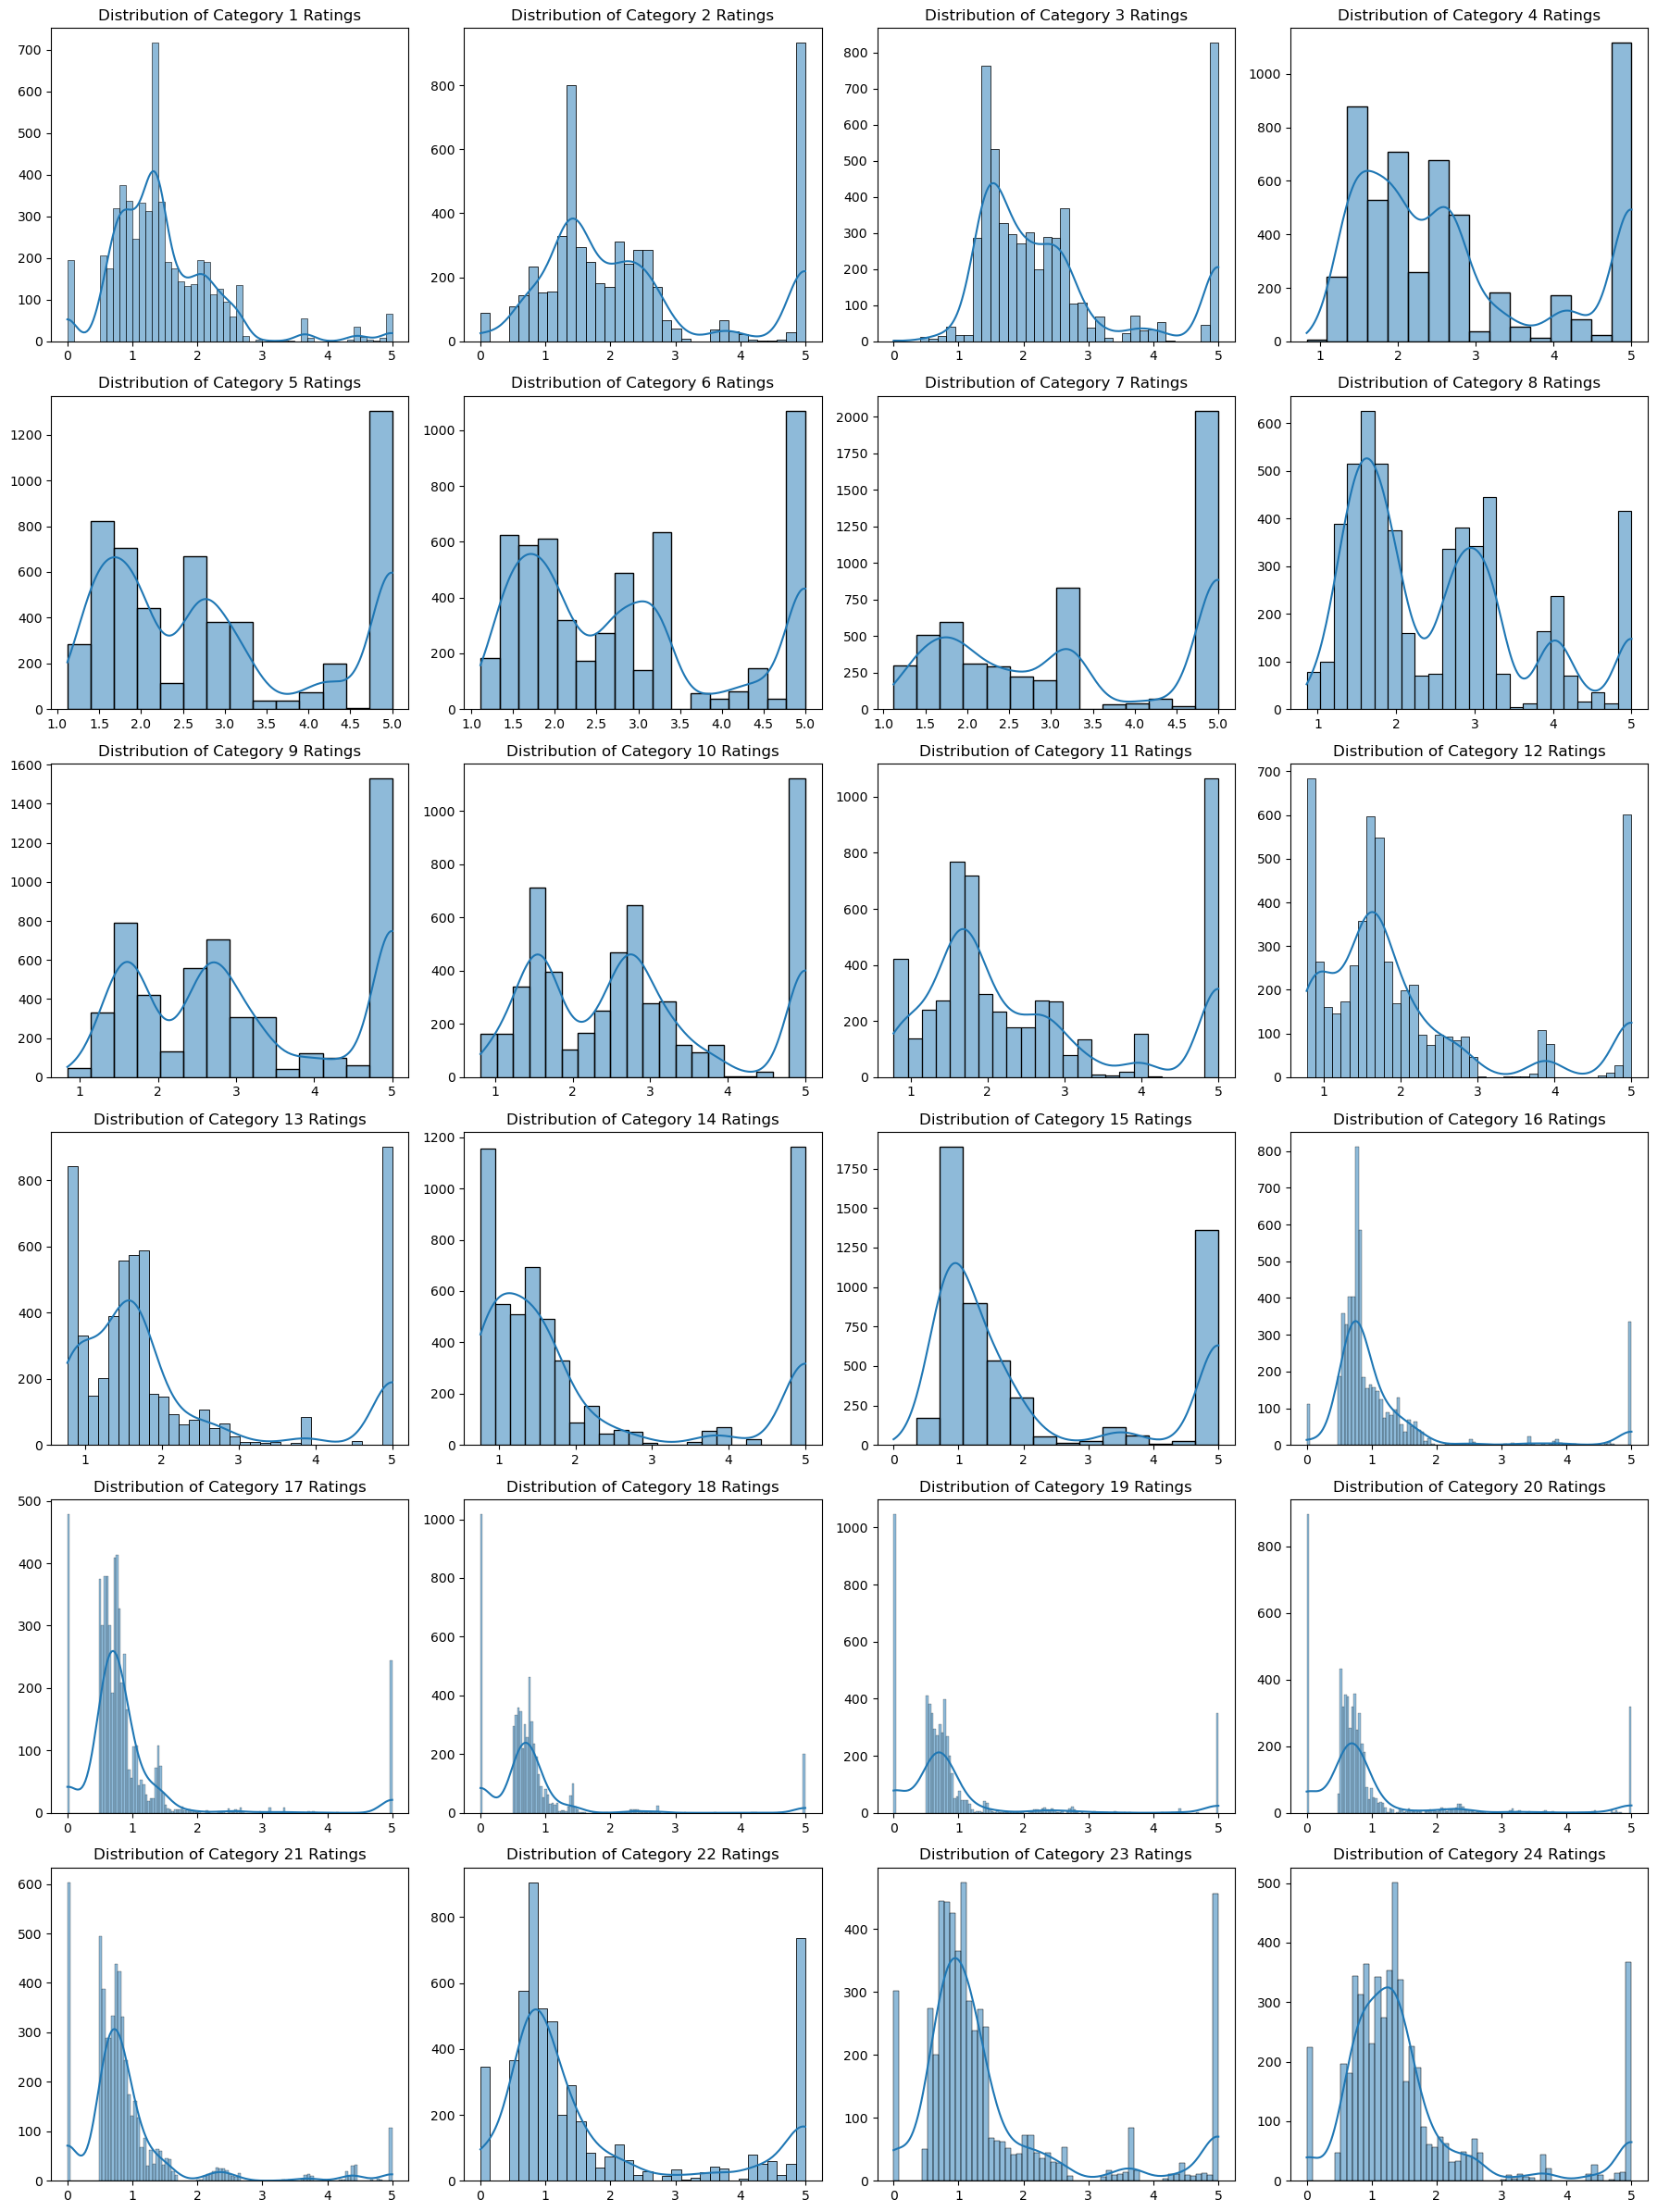

In [27]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Creating histograms for all categories
fig, axes = plt.subplots(6, 4, figsize=(18, 24))

# Plotting histograms for each category
for i, ax in enumerate(axes.flatten(), 1):
    sns.histplot(cleaned_data[f'Category {i}'], kde=True, ax=ax)
    ax.set_title(f'Distribution of Category {i} Ratings')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


## 4.2. Creating and Comparing Violin and Box-and-Whisker Charts for All Categories:
### 4.2.1. Violin Chart:
This chart will display the density of the ratings across categories, showing both the distribution shape and the spread.

### 4.2.2. Box-and-Whisker Chart:
This chart will provide insights into the median, quartiles, and potential outliers within each category.

Let’s visualize these for a comprehensive comparison.

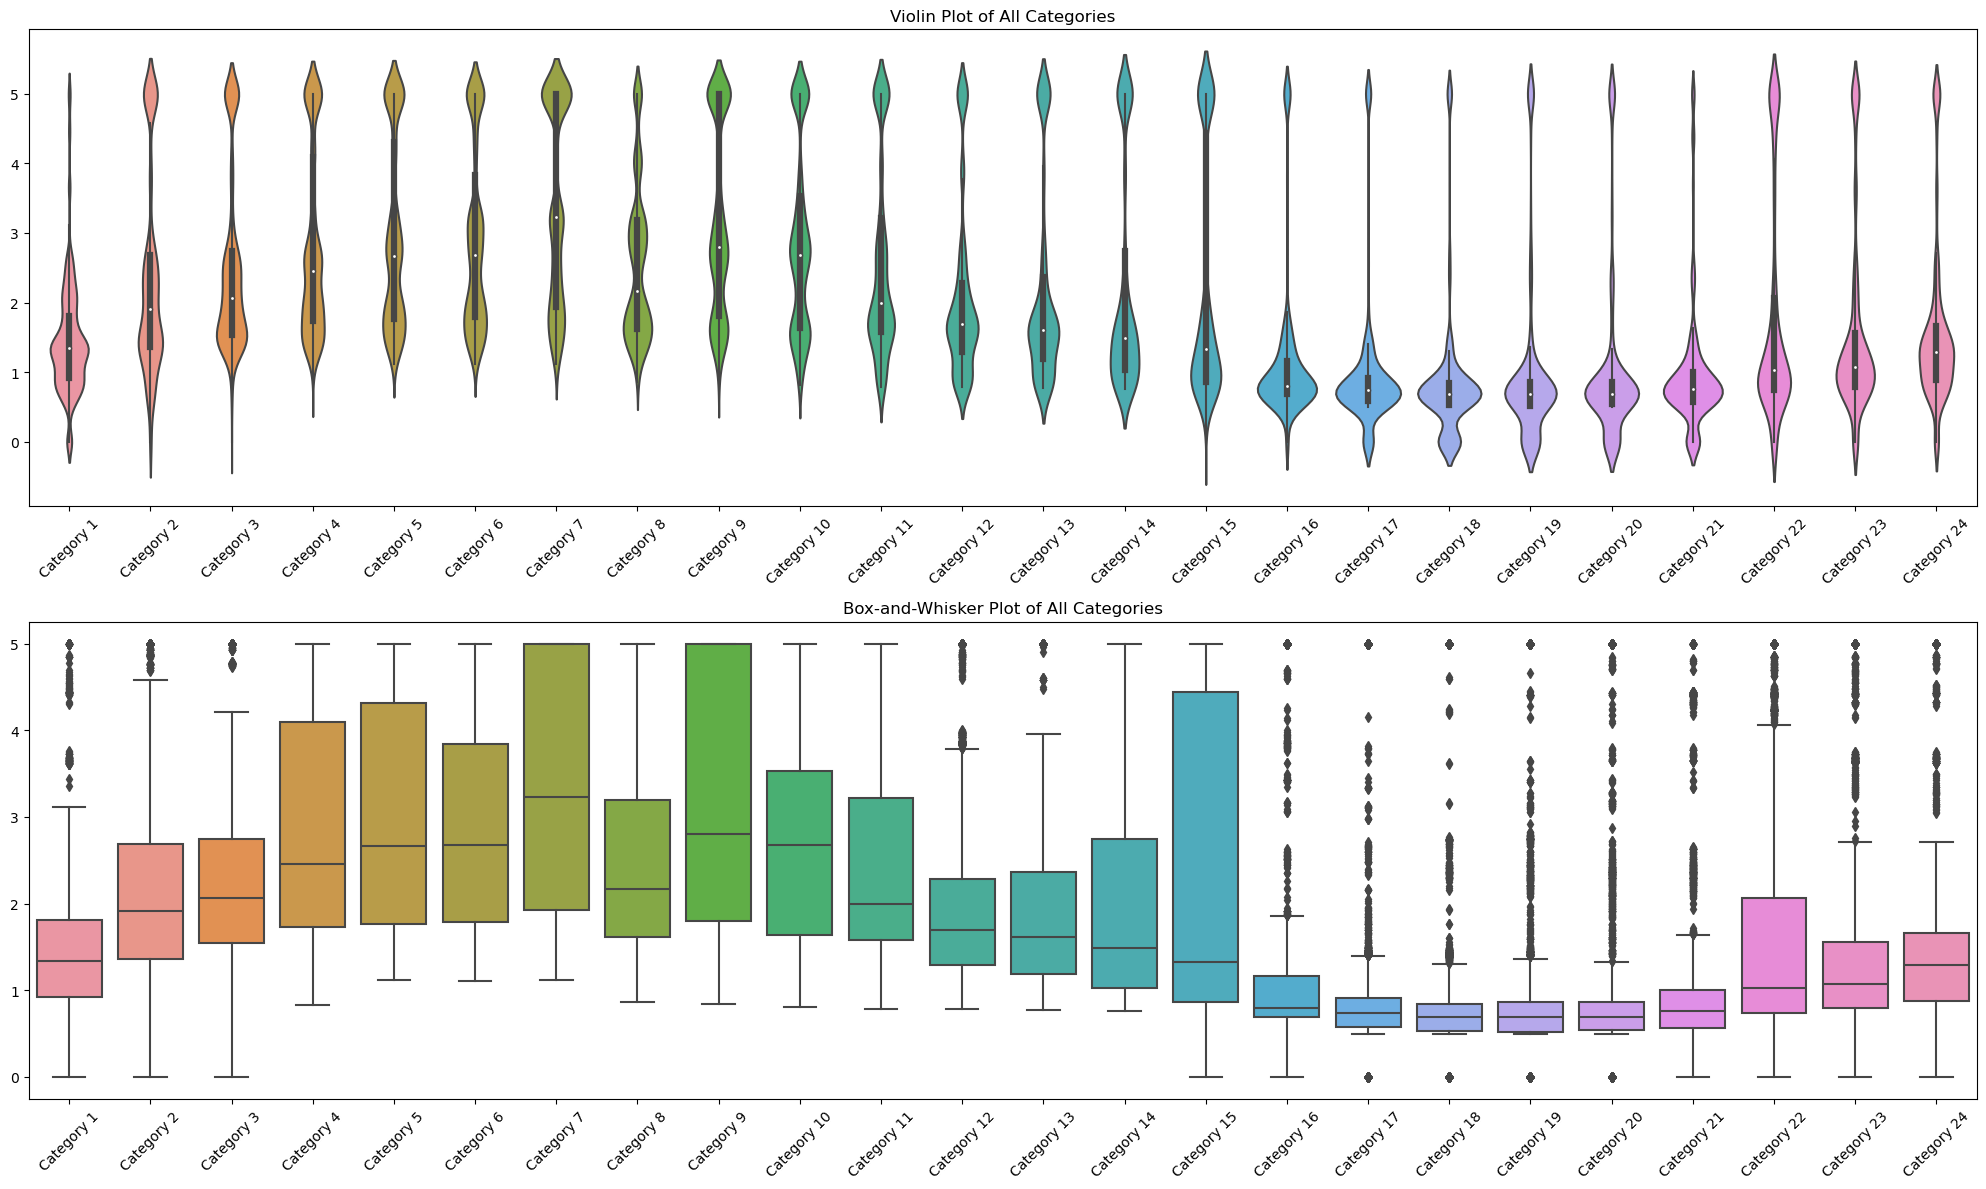

In [28]:
# Setting up the figure for violin and box plots
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Violin plot for all categories
sns.violinplot(data=cleaned_data, ax=axes[0])
axes[0].set_title('Violin Plot of All Categories')
axes[0].set_xticklabels([f'Category {i+1}' for i in range(24)], rotation=45)

# Box-and-whisker plot for all categories
sns.boxplot(data=cleaned_data, ax=axes[1])
axes[1].set_title('Box-and-Whisker Plot of All Categories')
axes[1].set_xticklabels([f'Category {i+1}' for i in range(24)], rotation=45)

plt.tight_layout()
plt.show()


Here are the violin and box-and-whisker charts for all categories:

### 4.2.3. Violin Plot Analysis:
- The violin plots show the density of the distribution for each category, highlighting both the central tendency and the variability. The width of each "violin" indicates the frequency of ratings at different levels. You can observe that some categories have broader distributions indicating higher variance among ratings, while others are more peaked.
### 4.2.4. Box-and-Whisker Plot Analysis:
- The box-and-whisker plots provide a clear view of the median, quartiles, and outliers within each category. Categories with long tails or dots outside the main box indicate the presence of outliers. The spread between the quartiles shows the interquartile range, which varies across categories.

Both chart types together offer a comprehensive view of how ratings are distributed across categories, helping to understand where users show high consensus versus where their opinions vary greatly. This analysis can further inform the clustering process by highlighting categories with distinct user behaviors.

## 4.3. Correlation Analysis:
Next, let's analyze the correlations between these categories to understand if there are any relationships or patterns that might be relevant for clustering users based on their preferences.

### 4.3.1. Generating a Correlation Matrix and Heatmap:

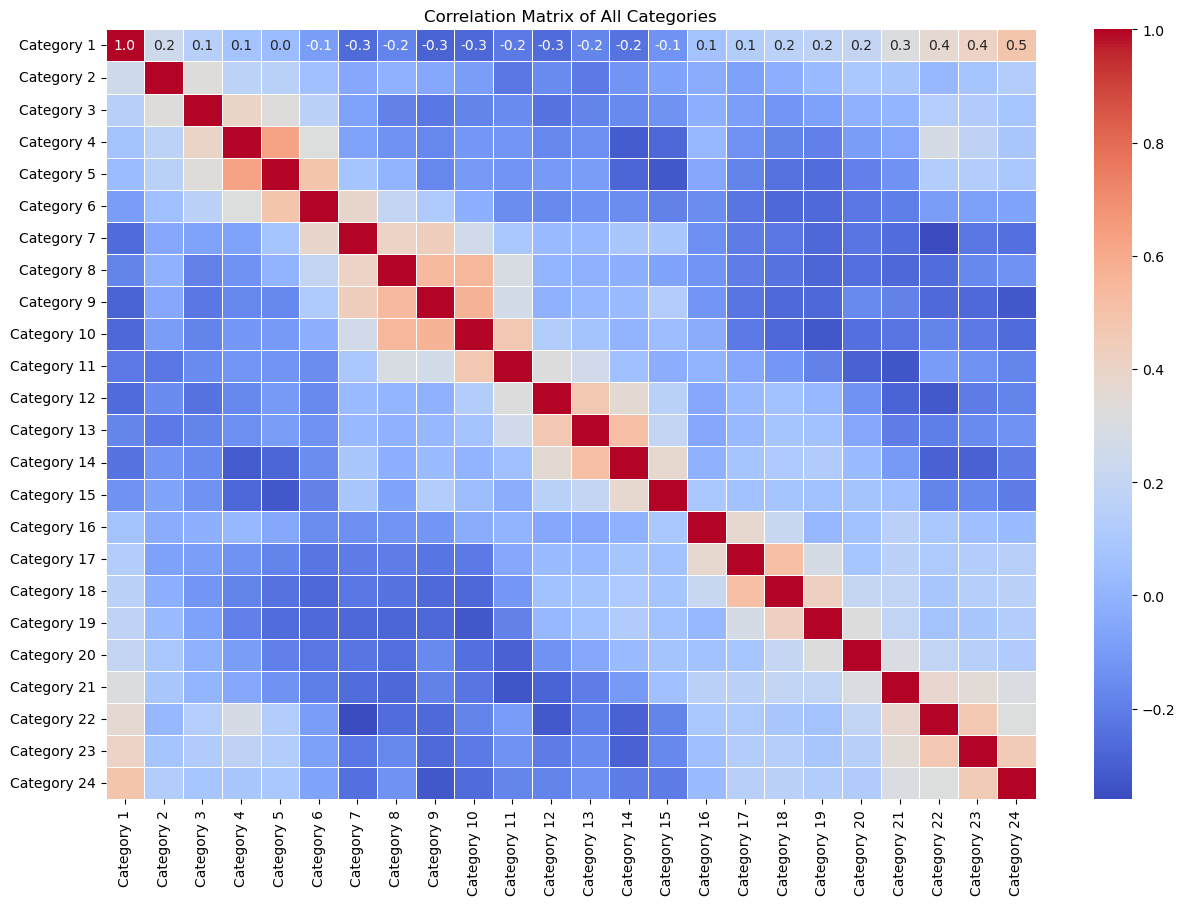

In [29]:
# Calculate the correlation matrix for all categories
correlation_matrix = cleaned_data.iloc[:, 1:].corr()  # Exclude the 'User' column

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of All Categories')
plt.show()


The heatmap displays the correlations between different rating categories. Values close to 1 or -1 indicate strong positive or negative correlations, respectively, while values around 0 suggest little to no correlation.

### 4.3.2. Observations:
Some categories show moderate to strong positive correlations, suggesting that users who rate one category highly tend to rate another similarly. These relationships could be used to cluster similar users.
Many categories have low correlations, indicating distinct preferences that can be used to differentiate user groups.

## 4.4. Data Normalization:
Before proceeding with clustering, it's beneficial to normalize the data to ensure each category contributes equally to the distance computations used in clustering algorithms.

### 4.4.1. Normalizing the Data:

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the data excluding the 'User' identifier
normalized_data = scaler.fit_transform(cleaned_data.iloc[:, 1:])

# Convert the normalized data back to a DataFrame for easier handling in later analysis
normalized_df = pd.DataFrame(normalized_data, columns=cleaned_data.columns[1:])

# Show a preview of the normalized data
normalized_df.head()


Category 1  Category 2  Category 3  Category 4  Category 5  Category 6  \
0   -1.758879   -1.632175    0.914663    0.651530    1.524728    0.020731   
1   -1.758879   -1.632175    0.914663    0.651530    1.524728    0.020731   
2   -1.758879   -1.632175    0.914663    0.636252    1.524728    0.020731   
3   -1.758879   -1.280420    0.914663    0.636252    1.524728    0.020731   
4   -1.758879   -1.632175    0.914663    0.636252    1.524728    0.020731   

   Category 7  Category 8  Category 9  Category 10  ...  Category 15  \
0     1.16655   -0.172031   -0.587139    -0.147413  ...    -0.271693   
1     1.16655    0.088926   -0.587139    -0.139763  ...    -0.271693   
2     1.16655    0.088926   -0.587139    -0.147413  ...    -0.271693   
3     1.16655   -0.172031   -0.587139    -0.147413  ...    -0.271693   
4     1.16655    0.088926   -0.587139    -0.147413  ...    -0.271693   

   Category 16  Category 17  Category 18  Category 19  Category 20  \
0    -0.544417    -0.461563    -0.867708     -0.39014    -0.837895   
1    -0.544417    -0.461563    -0.867708     -0.39014    -0.837895   
2    -0.544417    -0.461563    -0.867708     -0.39014    -0.837895   
3    -0.544417    -0.461563    -0.867708     -0.39014    -0.837895   
4    -0.544417    -0.461563    -0.867708     -0.39014    -0.837895   

   Category 21  Category 22  Category 23  Category 24  
0    -1.039898    -1.094936     -1.16336    -1.331912  
1    -1.039898    -1.094936     -1.16336    -1.331912  
2    -1.039898    -1.094936     -1.16336    -1.331912  
3    -1.039898    -1.094936     -1.16336    -1.331912  
4    -1.039898    -1.094936     -1.16336    -1.331912  

[5 rows x 24 columns]

The data has been successfully normalized, which standardizes the range of features to have a mean of zero and a standard deviation of one. This step is crucial for clustering algorithms that rely on distance calculations, like K-Means, ensuring that all features contribute equally to the results.

### 4.4.2. Histograms for each category of the normalized data

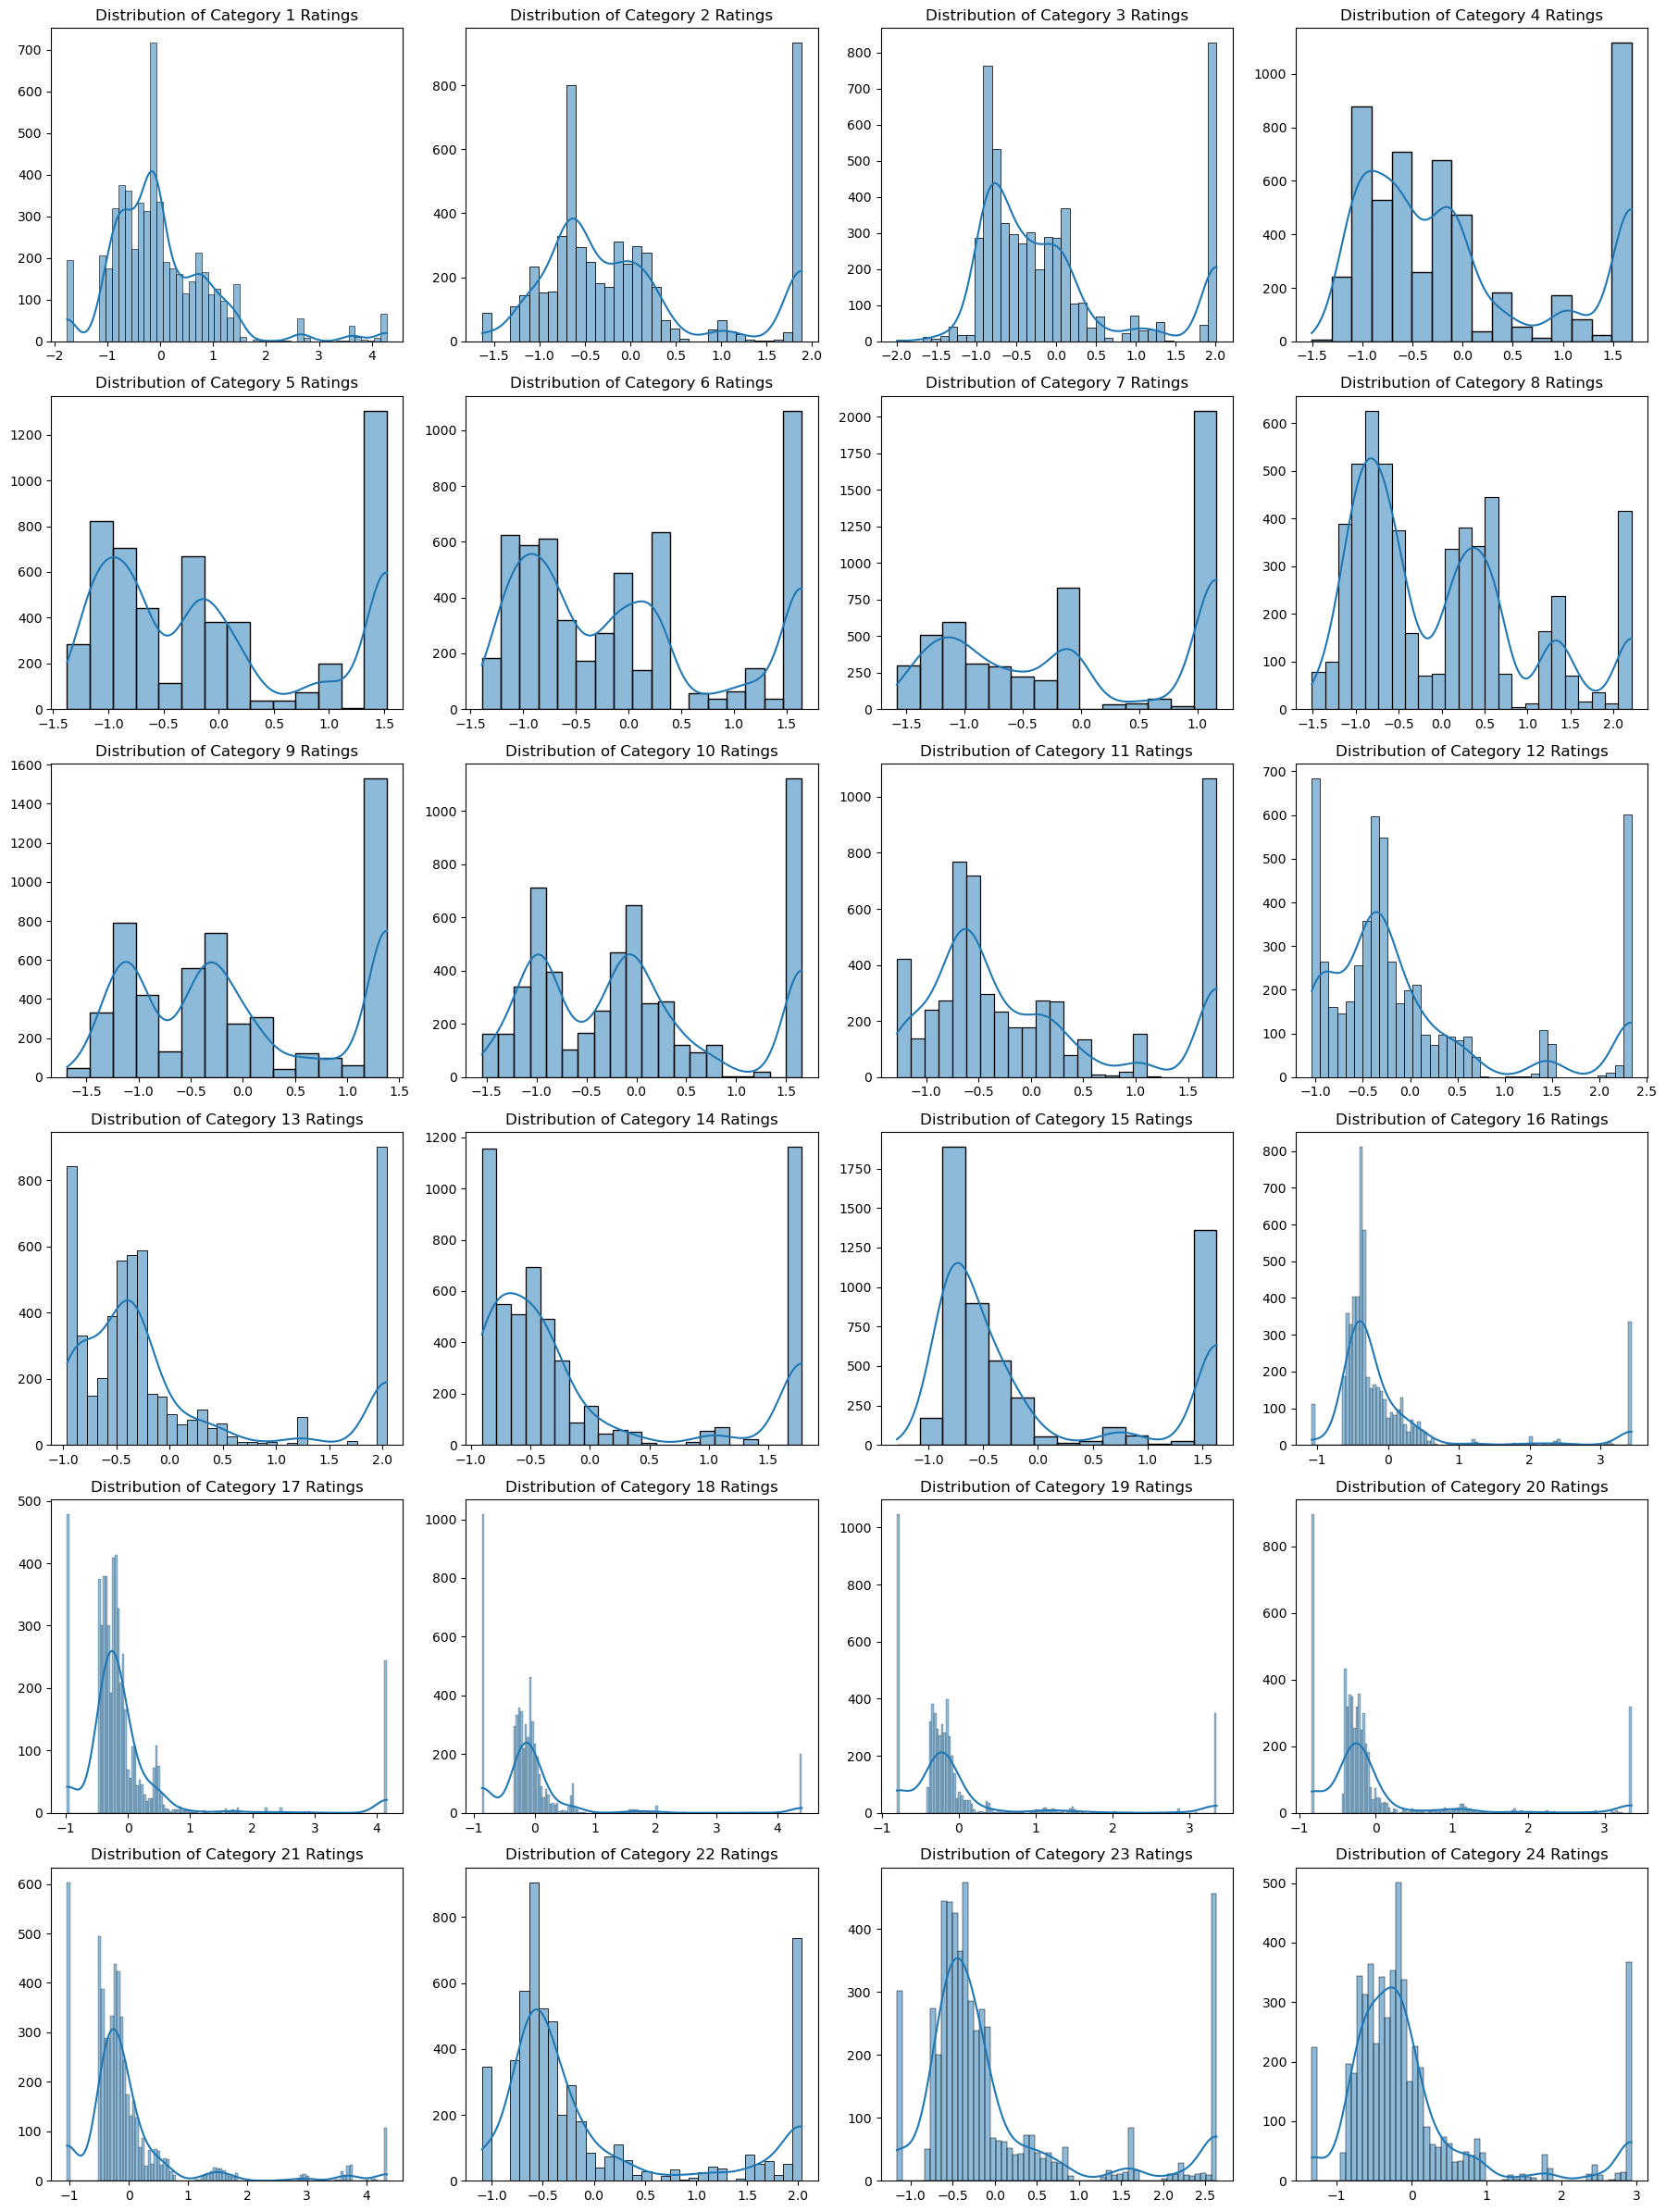

In [31]:
# Creating histograms for all categories
fig, axes = plt.subplots(6, 4, figsize=(18, 24))

# Plotting histograms for each category
for i, ax in enumerate(axes.flatten(), 1):
    sns.histplot(normalized_df[f'Category {i}'], kde=True, ax=ax)
    ax.set_title(f'Distribution of Category {i} Ratings')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


The histograms above provide a visual representation of the distribution for all categories, normalized to have zero mean and unit variance. Each plot represents the frequency of ratings within each category, showing various patterns across different aspects of the data.

### 4.4.3. Violin and box-and-whisker charts for all categories, normalized to have zero mean and unit variance

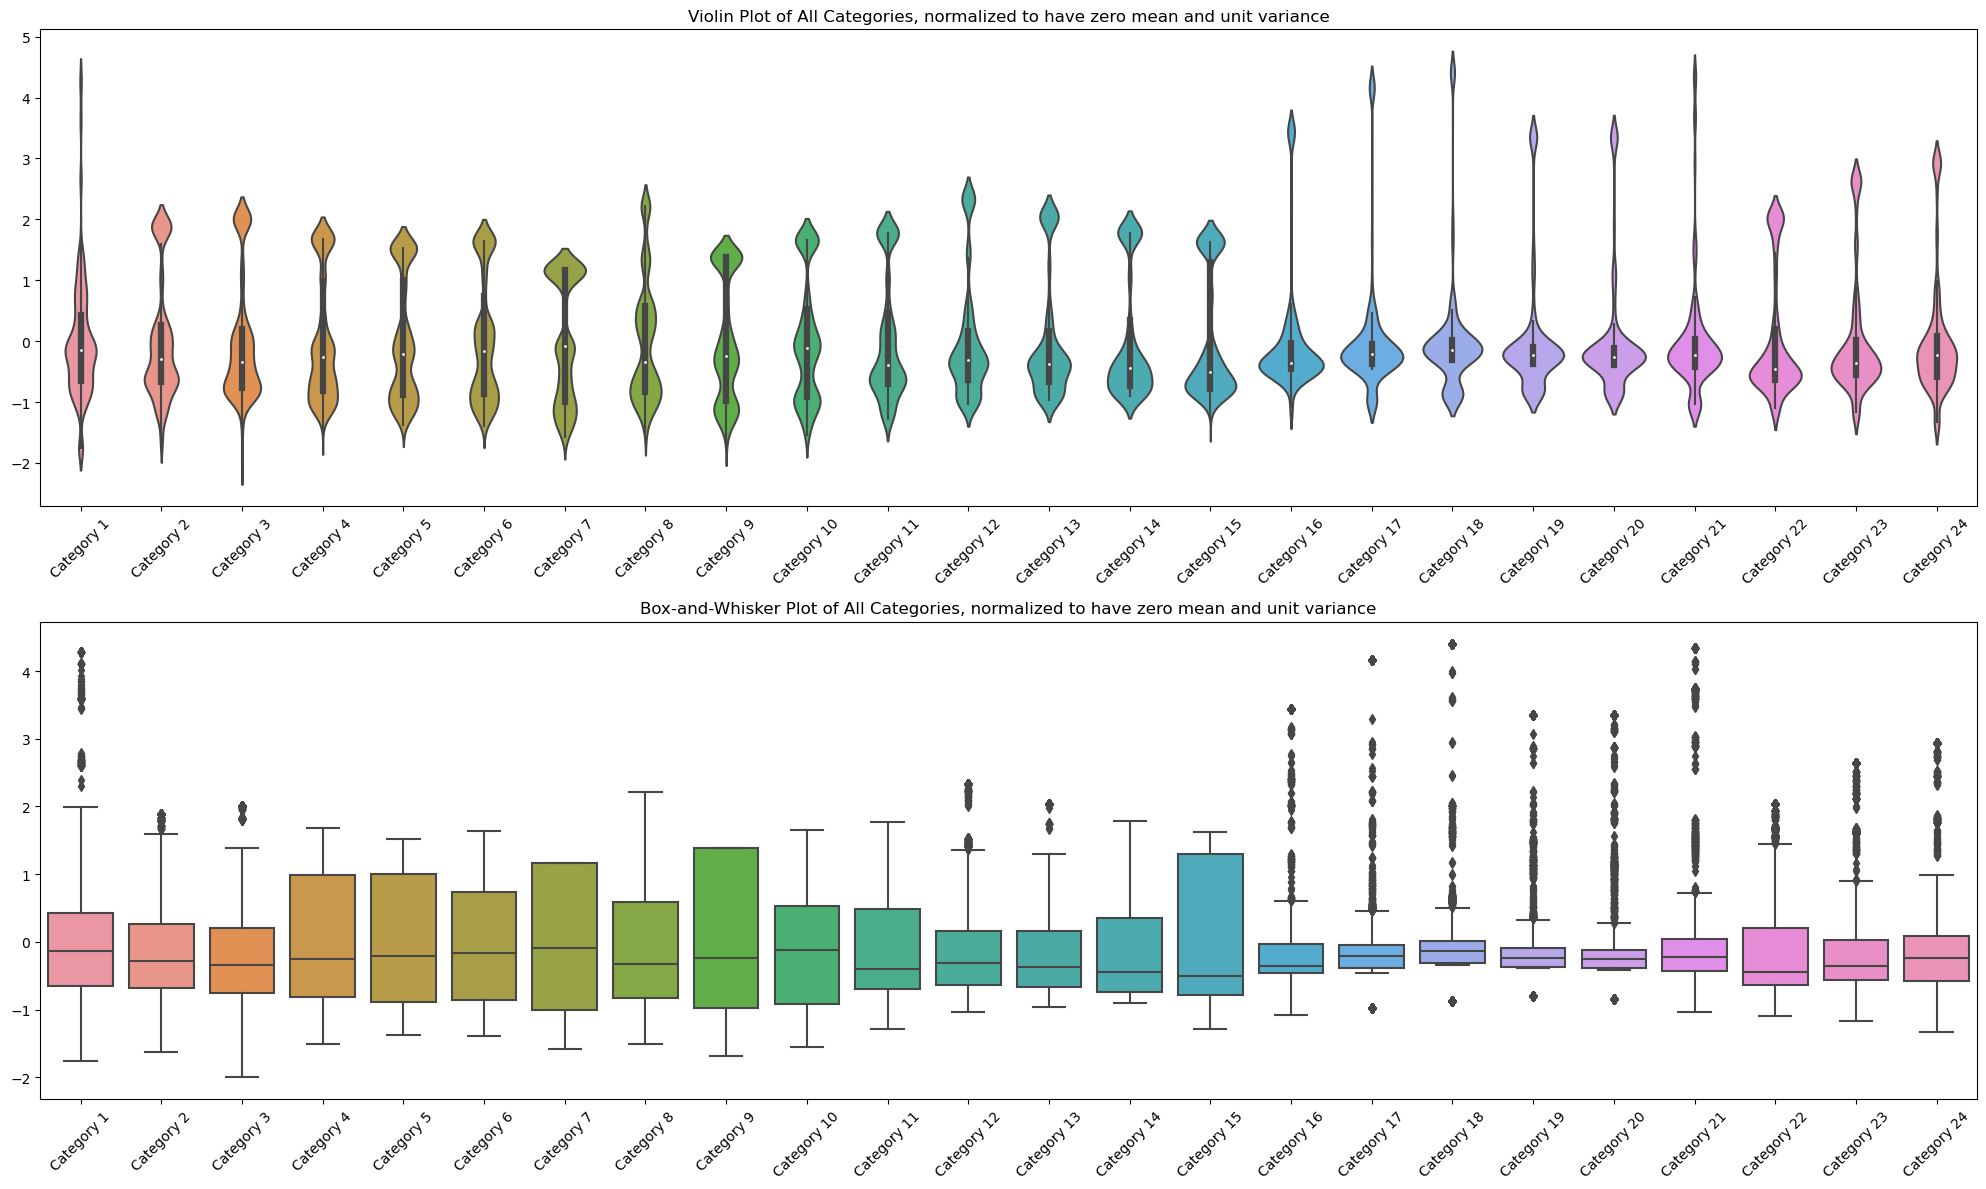

In [32]:
# Setting up the figure for violin and box plots
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Violin plot for all categories
sns.violinplot(data=normalized_df, ax=axes[0])
axes[0].set_title('Violin Plot of All Categories, normalized to have zero mean and unit variance')
axes[0].set_xticklabels([f'Category {i+1}' for i in range(24)], rotation=45)

# Box-and-whisker plot for all categories
sns.boxplot(data=normalized_df, ax=axes[1])
axes[1].set_title('Box-and-Whisker Plot of All Categories, normalized to have zero mean and unit variance')
axes[1].set_xticklabels([f'Category {i+1}' for i in range(24)], rotation=45)

plt.tight_layout()
plt.show()


Here are the violin and box-and-whisker charts for all categories, normalized to have zero mean and unit variance:

#### 4.4.3.1. Violin Plot Analysis:
The violin plots show the density of the distribution for each category, highlighting both the central tendency and the variability. The width of each "violin" indicates the frequency of ratings at different levels. You can observe that some categories have broader distributions indicating higher variance among ratings, while others are more peaked.
#### 4.4.3.2. Box-and-Whisker Plot Analysis:
The box-and-whisker plots provide a clear view of the median, quartiles, and outliers within each category. Categories with long tails or dots outside the main box indicate the presence of outliers. The spread between the quartiles shows the interquartile range, which varies across categories.
Both chart types together offer a comprehensive view of how ratings are distributed across categories, helping to understand where users show high consensus versus where their opinions vary greatly. This analysis can further inform the clustering process by highlighting categories with distinct user behaviors. 

# 5. Clustering with K-Means:
Now, let's apply the K-Means clustering algorithm to identify distinct groups of users based on their normalized ratings across different categories. I'll start with choosing an appropriate number of clusters using the Elbow Method.

## 5.1. Applying the Elbow Method to Determine Optimal Number of Clusters (hyperparameter optimization)

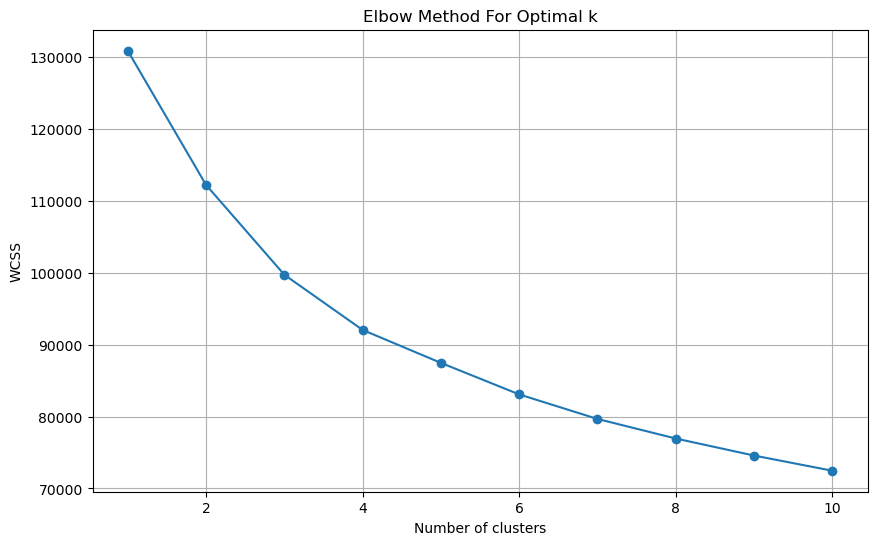

In [33]:
from sklearn.cluster import KMeans

# Ignore all warnings:
import warnings
warnings.filterwarnings('ignore')

# Using the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=5, random_state=39)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Here are the silhouette scores for different numbers of clusters (k) from 2 to 10. The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates that clusters are well-separated and dense.

### 5.1.1 Elbow Method:
The WCSS (Within-Cluster Sum of Square) plot shows a continuous decrease but tends to flatten as k increases, particularly after k=6. Typically, the "elbow" is the point where the WCSS curve starts to flatten out significantly, indicating diminishing returns on adding more clusters.

## 5.2 Applying the Silhouette Method to Determine Optimal Number of Clusters (hyperparameter optimization)

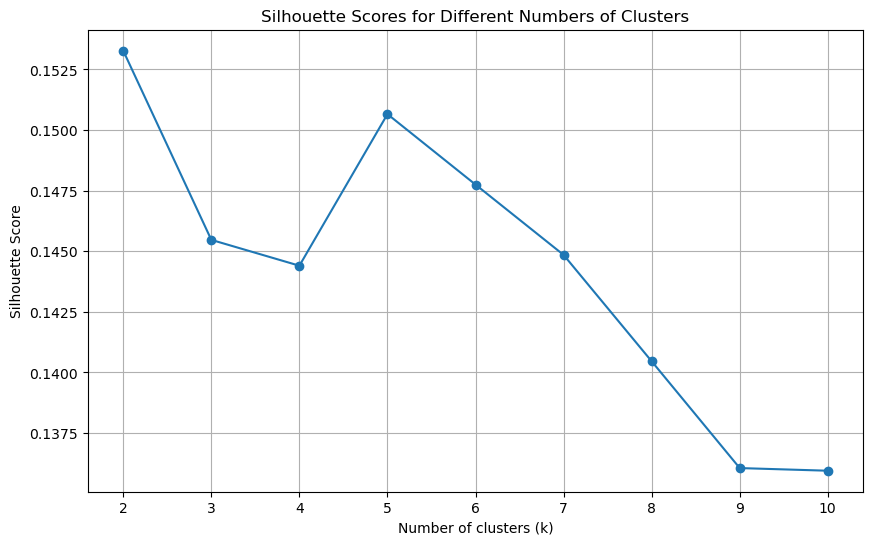

In [34]:
# Re-import matplotlib for plotting
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Recompute silhouette scores for different values of k using the sampled data
silhouette_scores = []
k_range = range(2, 11)  # Starting from 2 because silhouette score cannot be calculated for k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5, random_state=39)
    cluster_labels = kmeans.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### 5.2.1 Silhouette Scores:
- The silhouette scores vary across different values of k, indicating how well each clustering setup captures the natural divisions within the data.
- Typically, you would look for a peak in the silhouette score to determine the optimal number of clusters. The plot suggests that some values of k provide better cluster separation than others, though the differences aren't drastic.
- The silhouette scores show a peak at 𝑘=5. Higher silhouette scores indicate better defined and separated clusters.

## 5.3. Comparison and Recommendation:
- Elbow Method: The plot suggests that increasing the number of clusters beyond 6 doesn't significantly improve the compactness of the clusters (as the rate of decrease in WCSS slows down).

- Silhouette Scores: The peak at **k=5** suggests this number of clusters achieves a good balance of separation and cohesion among clusters.

#### 5.3.1 Given the analysis:

- The silhouette score at **k=5** is compelling because it indicates not only are the clusters compact but also well-separated from each other, which is a key indicator of a good clustering setup.
- The elbow method supports this by showing that additional clusters beyond this point offer minimal improvement in WCSS, thus supporting k=5 as a balance between too few and too many clusters.

#### 5.4.2 Conclusion: 
**k=5** is the optimal number of clusters to use for your data based on the silhouette scores and the elbow method. This choice should provide meaningful, distinct clusters that can be useful for further analysis or application-specific needs.

## 5.4. PCA Visualization of clustering results by the K-Means algorithm
Here is the 2-dimensional PCA plot of the clustering results with k=5. Each point in the plot represents a normalized data from the dataset, and the colors correspond to the five different clusters identified by the K-Means algorithm.

This visualization helps illustrate how the data points are grouped into clusters in a reduced-dimensional space, providing a clearer view of the separation and grouping inherent in the dataset based on the chosen clustering method.

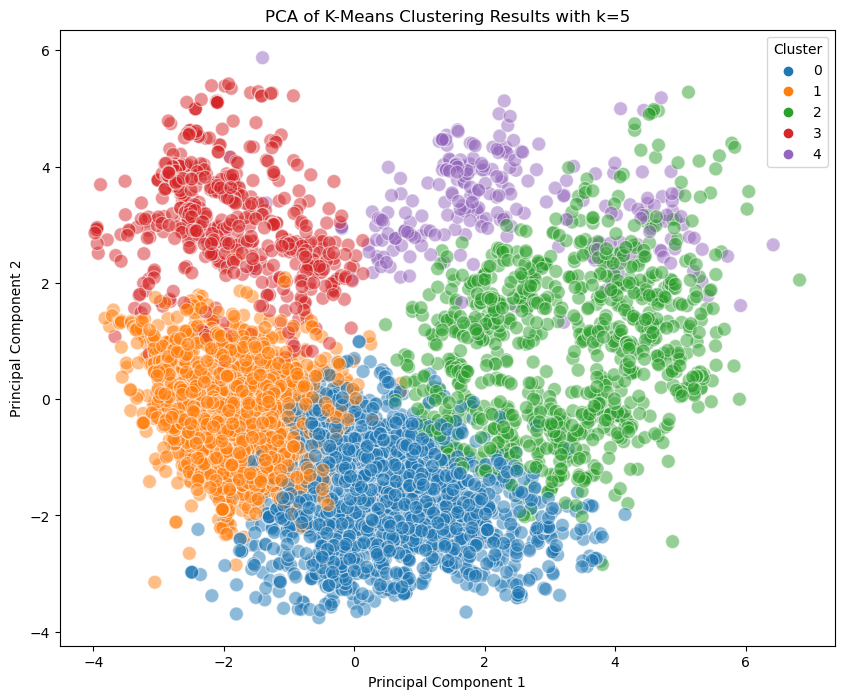

In [35]:
from sklearn.decomposition import PCA

# Perform K-means clustering with k=5 on the sampled data
kmeans_final = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=5, random_state=39)
cluster_labels_final = kmeans_final.fit_predict(normalized_df)

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels_final

# Plotting the PCA reduced data with clusters color-coded
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='tab10', data=pca_df, s=100, alpha=0.5)
plt.title('PCA of K-Means Clustering Results with k=5')
plt.show()



### 5.4.1. Key observations;

- The graph displays data points projected onto the two principal components.
- There are 5 groups, each distinguished by a color.
- Principal Component 1 is, on the axis while Principal Component 2 is on the axis.
- Certain groups, like blue and orange show dispersion whereas others, like red and purple are tightly packed.
- Clusters overlap in some areas towards the center of the graph.

###  5.4.2. Analysis;

- The PCA visualization simplifies complex data into two dimensions providing an overview of cluster structures.
- The distribution of clusters reflects varying levels of similarity, within each group.
- Overlap areas suggest that some data points share characteristics that could belong to clusters.

## 5.5. t-SNE Visualization of clustering results by the K-Means algorithm
Visualize the results of k-Means clustering at K=5 using the dimensionality reduction algorithm t-SNE (t-Distributed Stochastic Neighbor Embedding). t-SNE is a dimension reduction algorithm to reduce high-dimensional data to two dimensions t-SNE is a dimensionality reduction algorithm to reduce high dimensional data to two dimensions.

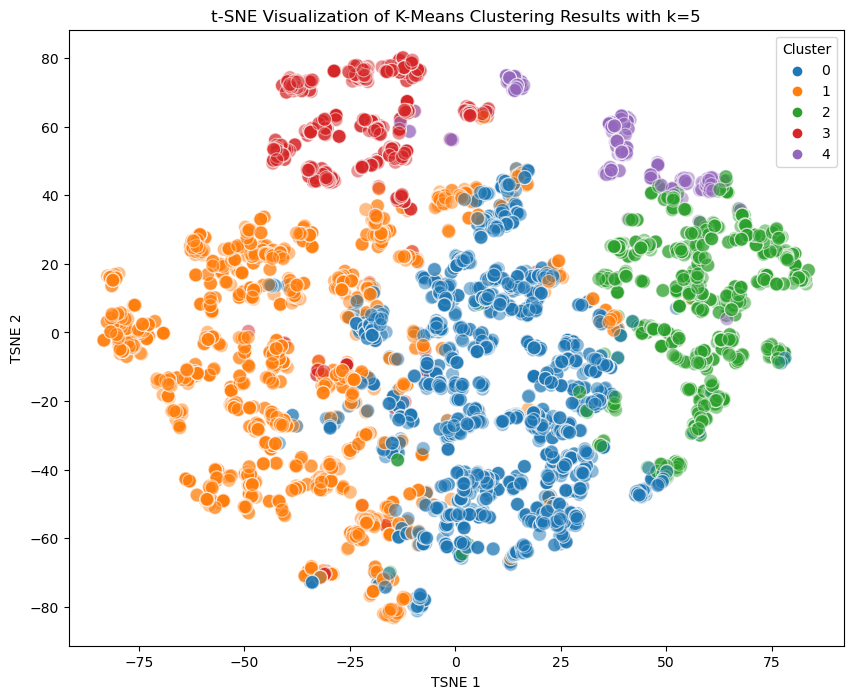

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply K-Means clustering
cluster_labels = kmeans_final.fit_predict(normalized_df)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(normalized_df)

# Prepare DataFrame for plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE 1', y='TSNE 2', hue='Cluster', palette='tab10', data=tsne_df, s=100, alpha=0.5)
plt.title('t-SNE Visualization of K-Means Clustering Results with k=5')
plt.show()

### 5.5.1. Key observations;

- Each cluster is depicted using a color.
- The clusters are visibly separated compared to the PCA visualization.
- Certain clusters, like blue and orange are larger. Spread out while others, such as red and purple are tightly packed.
- The axes represent the two t-SNE dimensions, which do not have an interpretation like PCA components.

### 5.5.2. Analysis;;

-  t-SNE excels at preserving structures in data sets leading to clearer cluster distinctions.
-  The diverse sizes and shapes of clusters indicate characteristics within each group.
-  The improved separation between clusters suggests that the K-Means algorithm has successfully identified groups, within the dimensional space.

## 5.6. Overall summary of the K Means outcomes;

- Cluster Identification; The K Means algorithm has effectively recognized groups, within the dataset, evident from the representations.
- Cluster Characteristics; The diverse sizes and shapes of clusters indicate traits within each group. Some clusters are tightly packed, signaling preferences within while others are more dispersed indicating a range of preferences.
- Comparison of Dimensionality Reduction Techniques; Contrasting the PCA and t SNE visuals underscores the datas intricacy. PCA displays a projection with cluster overlaps whereas t SNE reveals clearer separations hinting at non linear relationships in the data.
- Cluster Consistency; The consistency in cluster shapes and positions across both visuals (like the blue and orange clusters) implies robust groupings that hold true across different dimensionality reduction methods.
- Opportunities for Further Examination; These visual representations serve as a foundation, for analysis. 
Each group likely signifies a set of individuals who share interests within different categories (such, as places of worship vacation destinations, shorelines, etc.) outlined in your data collection.

# 6. Hierarchical Clustering
Now, let's apply the Hierarchical Clustering algorithm to identify distinct groups of users based on their normalized ratings across different categories.

## 6.1.  Dendograms and PCA Visualization of clustering results by Hierarchical Clustering
Next, Hierarchical Clustering is applied to the same data. The results are visualized with dendograms and PCA.

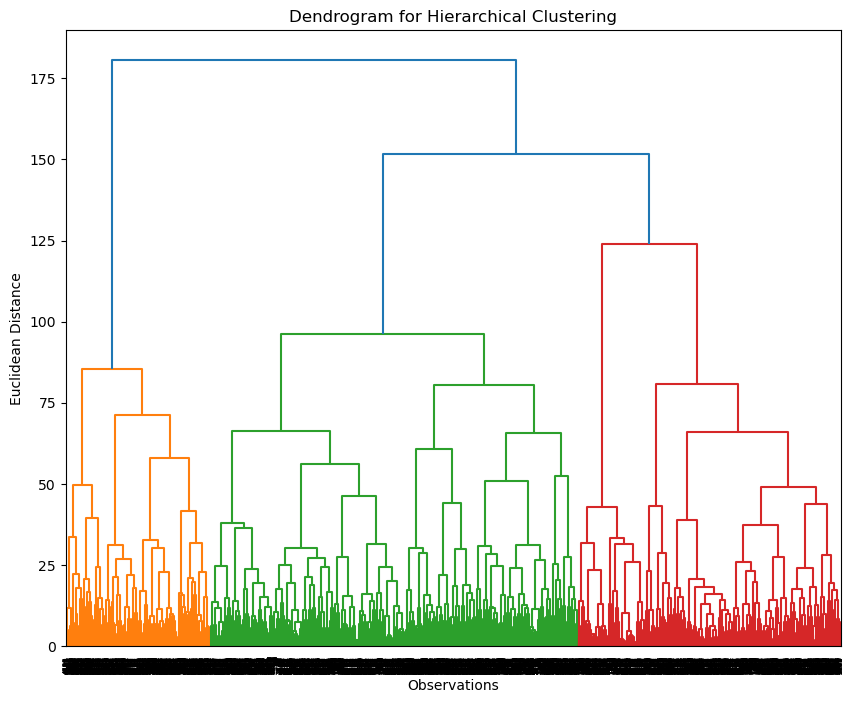

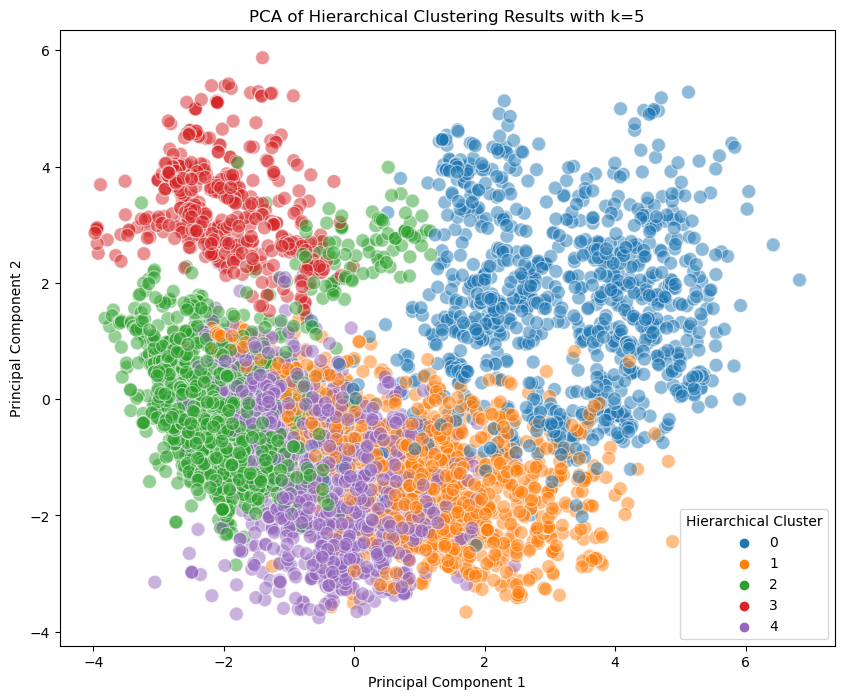

In [37]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd


# Apply hierarchical clustering with 'ward' linkage, which uses 'euclidean' affinity by default
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(normalized_df)

# Adding hierarchical clustering results to the PCA DataFrame for visualization
pca_df['Hierarchical Cluster'] = hierarchical_labels

# plotting the dendrogram for hierarchical clustering
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(normalized_df, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.show()

# Plotting the PCA results with hierarchical clustering labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Hierarchical Cluster', 
                palette='tab10', data=pca_df, s=100, alpha=0.5)
plt.title('PCA of Hierarchical Clustering Results with k=5')
plt.show()





### 6.1.1. Key observations (Dendograms);

- The vertical y axis illustrates the distance, between clusters using measurements.
- The horizontal x axis represents data points.
- Different colored segments (orange, green, blue and red) on the graph indicate varying degrees of clustering.
- The length of each branch shows the merging distance between clusters.

### 6.1.2. Analysis (Dendograms);

- The dendrogram visually presents how data points are organized into groups based on their similarity levels.
- Taller vertical lines indicate distances between clusters highlighting groupings.
- The color scheme suggests a grouping, into 3-5 clusters.


### 6.1.3. Key observations (PCA);

- I can see five groups, each shown in a color.
- The horizontal and vertical axes represent the secondary aspects, respectively.
- Certain groups (, like blue and orange) are more scattered while others (such as red and purple) are tightly packed.
- There is some mixing between the groups in the middle of the graph.

### 6.1.4. Analysis (PCA);

- The PCA visualization simplifies the data into two dimensions giving us a view of how the groups are structured.
- The dispersion of groups indicates levels of similarity, within each group.
- Areas where groups overlap suggest that some data points may share characteristics with groups.

## 6.2.  t-SNE Visualization of clustering results by the Hierarchical Clustering
Visualize the results of Hierarchical Clustering with K=5 using the dimensionality reduction algorithm t-SNE (t-Distributed Stochastic Neighbor Embedding). t-SNE is a dimensionality reduction algorithm that reduces high-dimensional data to two dimensions. The t-SNE is a dimensionality reduction algorithm that reduces high-dimensional data to two dimensions.

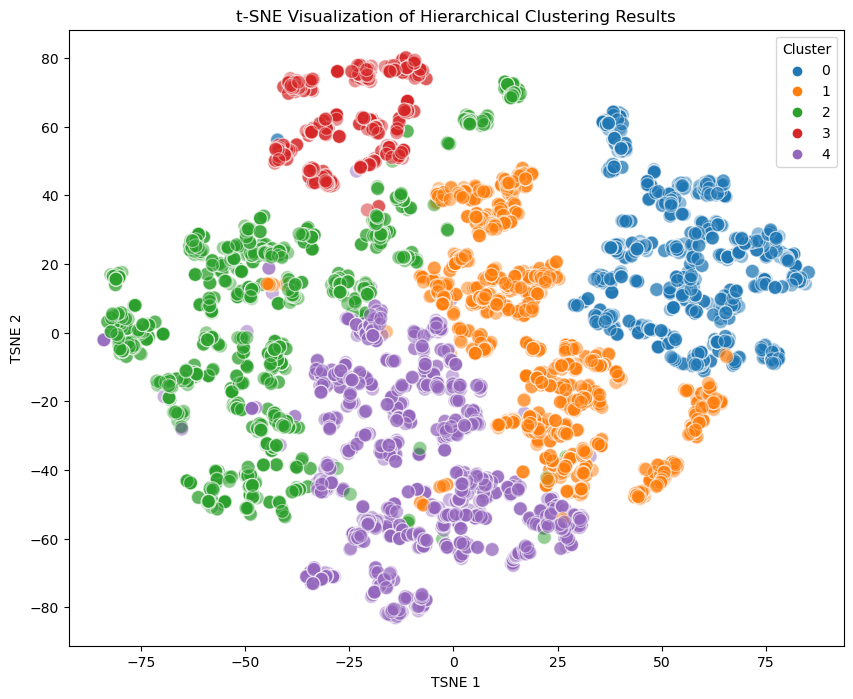

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(normalized_df)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=39)
tsne_results = tsne.fit_transform(normalized_df)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Cluster'] = hierarchical_labels

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE 1', y='TSNE 2', hue='Cluster', palette='tab10', data=tsne_df, s=100, alpha=0.5)
plt.title('t-SNE Visualization of Hierarchical Clustering Results')
plt.show()


### 6.2.1. Key observations (t-SNE);

- I can see five clusters that match the colors shown in the PCA plot.
- The clusters seem spread out compared to what we see in the PCA visualization.
- Some clusters, like the orange ones, exhibit structures or sub groups.
- The red cluster appears to be the packed and isolated.

### 6.2.2. Interpretation (t-SNE);

- t-SNE does a job of preserving structures in complex data resulting in more visibly distinct clusters.
- The defined boundaries between clusters indicate that hierarchical clustering has successfully identified separate groups within the multidimensional space.
- Internal structures within clusters hint at sub categories or varying degrees of similarity within these groups.

## 6.3. Overall interpretation of Hierarchical Clustering results;

- The algorithm has effectively recognized five clusters within the dataset.
- These clusters differ in size and compactness suggesting varying levels of similarity within each group.
- Hierarchical clustering allows for interpretation at levels of detail offering insights into both trends and subtle patterns in user preferences.
- The t-SNE visualization uncovers intricate relationships within and across clusters compared to PCA showcasing the nature of connections, in dimensional data.The consistent shapes and positions of clusters, in both PCA and t-SNE visualizations indicate that these groupings are strong and significant.

These findings offer understanding into the organization of user preferences, in your data, which can be utilized for tailored marketing, customized suggestions or deeper examination of user behavior trends. The hierarchical method also enables interpretation at levels of intricacy depending on the particular requirements of my analysis or usage. 

## 6.3. Overall results and interpretation of Hierarchical Clustering

- The hierarchical clustering technique successfully identified 5 groups within the dataset.
- The dendrogram visually represents how these clusters are interconnected at levels of similarity illustrating their structure.
- Through PCA visualization we can see a transformation of the data that illustrates how the clusters are spread out based on features (principal components). The overlapping clusters suggest that some distinctions, between them may be subtle or related to features not well represented by the two components.
- Alternatively t SNE visualization offers a linear transformation that tends to maintain local structures in high dimensional data better. The clearer separation of clusters in this view indicates meaningful distinctions exist between them though these differences may be intricate and not easily captured by methods like PCA.
- The varied shapes and sizes of the clusters in both visualizations imply differing characteristics among them. Some clusters are closely packed, indicating preferences within those groups while others are more dispersed reflecting a broader range of preferences, within each cluster.
- The hierarchical nature of clustering permits interpretation at levels of detail enabling us to comprehend both trends and specific patterns in user preferences effectively.

# 7. Spectral Clustering
Now, let's apply the Spectral Clustering algorithm to identify distinct groups of users based on their normalized ratings across different categories. 

## 7.1. PCA Visualization of clustering results by the Spectral Clustering algorithm
Here is the 2-dimensional PCA plot of the clustering results with k=5. Each point in the plot represents a normalized data from the dataset, and the colors correspond to the five different clusters identified by the Spectral Clustering algorithm.

This visualization helps illustrate how the data points are grouped into clusters in a reduced-dimensional space, providing a clearer view of the separation and grouping inherent in the dataset based on the chosen clustering method.

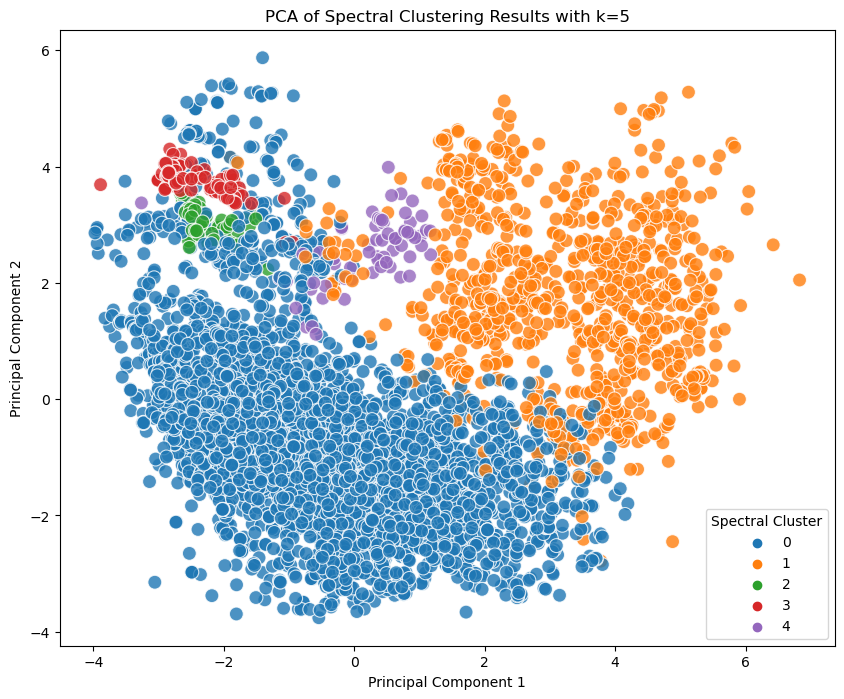

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=39)
spectral_labels = spectral_clustering.fit_predict(normalized_df)

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Spectral Cluster'] = spectral_labels

# Plotting PCA results with Spectral Clustering labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Spectral Cluster', 
                palette='tab10', data=pca_df, s=100, alpha=0.8)
plt.title('PCA of Spectral Clustering Results with k=5')
plt.show()


### 7.1.1 Key observations;

- The graph displays data points projected onto the two components.
- There are 5 groups, each shown in a color.
- Principal Component 1 is, on the x axis while Principal Component 2 is, on the y axis.
- The blue group (0) is the extensive and widely spread across the plot.
- The orange group (1) comes next in size. Is mostly concentrated on the side of the graph.
- The green (2) red (3) and purple (4) groups are smaller and more tightly packed mainly situated in the center and left regions of the plot.

### 7.1.2. Analysis;

- By visualizing PCA I can simplify data into two dimensions to grasp cluster structures better.
- The prevalence of the group hints at a number of data points sharing similar characteristics.
- Clusters 2, 3, and 4 being compact suggest these groups have defined traits.

## 7.2. t-SNE Visualization of clustering results by the Spectral Clustering algorithm
Visualize the results of Spectral Clustering at K=5 using the dimensionality reduction algorithm t-SNE (t-Distributed Stochastic Neighbor Embedding). t-SNE is a dimension reduction algorithm to reduce high-dimensional data to two dimensions t-SNE is a dimensionality reduction algorithm to reduce high dimensional data to two dimensions.

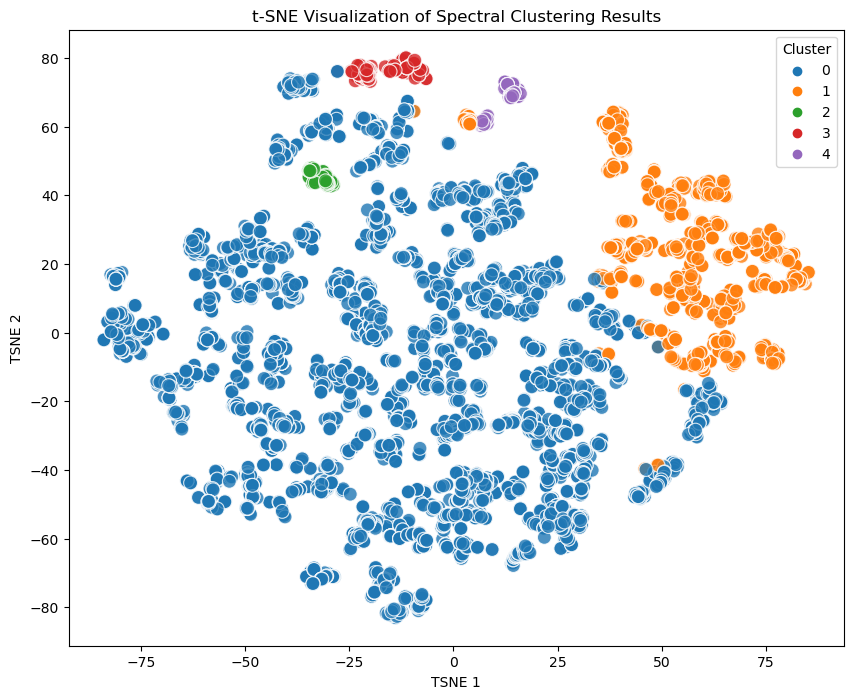

In [40]:
# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=39)
tsne_results = tsne.fit_transform(normalized_df)

# Prepare DataFrame for plotting
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Cluster'] = spectral_labels

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE 1', y='TSNE 2', hue='Cluster', palette='tab10', data=tsne_df, s=100, alpha=0.8)
plt.title('t-SNE Visualization of Spectral Clustering Results')
plt.show()


### 7.2.1. Key observations;

- The plot displays 5 clusters corresponding to the PCA graph.
- Each cluster is assigned a color aligning with the color scheme, in the PCA plot.
- The clusters are clearly separated than in the PCA visualization.
- Although the predominant blue cluster (0) remains the largest it is fragmented into subgroups scattered throughout the plot.
- In this visualization the orange cluster (1) appears cohesive forming a group on the right side.
- Clusters green (2) red (3) and purple (4) are small and tightly packed together forming groups in regions of the plot.

### 7.2.2. Analysis;

- t-SNE excels at preserving structures within dimensional data resulting in more visibly separate clusters.
- The division of the cluster into subgroups implies that while these data points share similarities to be clustered together by spectral clustering they still possess unique underlying structures.
- The compactness of clusters 2, 3, and 4 remains consistent, across both visualizations suggesting that these groups are well defined and distinct.

## 7.3 Summary of Spectral Clustering findings;

- Group Identification; Spectral Clustering has identified 5 groups in the data with one group (blue) and four smaller more specialized groups.
- Group Characteristics; The different sizes and shapes of the clusters imply features for each group. The large blue cluster likely represents a category while the smaller clusters portray specific niche groups.
- Comparison of Dimensionality Reduction Techniques; The t-SNE visualization uncovers intricate structures within the clusters compared to PCA in the cluster. This hints at relationships that t SNE captures better.
- Cluster Consistency; The stability of clusters 2, 3, and 4 in both visualizations indicates well defined groupings.
- Opportunities for Further Exploration; The substructures within the t-SNE visualization within the blue cluster present avenues for deeper analysis to understand nuances within this large group.

Spectral Clustering has successfully organized the data into clusters offering insights, into user preference patterns within your dataset.
The program appears to excel in pinpointing groups (clusters 2, 3, and 4) while also encompassing a broader more varied group (cluster 0). These findings could be utilized for tailored marketing strategies, individualized suggestions or, in depth examination of user behavior trends focusing on the subtleties, within the group.

#  8. Gaussian Mixture Model (GMM) clustering
Now, let's apply the Gaussian Mixture Model (GMM) clustering to identify distinct groups of users based on their normalized ratings across different categories.

## 8.1. PCA Visualization of clustering results by the Gaussian Mixture Model (GMM) clustering
Here is the 2-dimensional PCA plot of the clustering results with k=5. Each point in the plot represents a normalized data from the dataset, and the colors correspond to the five different clusters identified by theGaussian Mixture Model (GMM) clustering.

This visualization helps illustrate how the data points are grouped into clusters in a reduced-dimensional space, providing a clearer view of the separation and grouping inherent theour dataset based on the chosen clustering method.

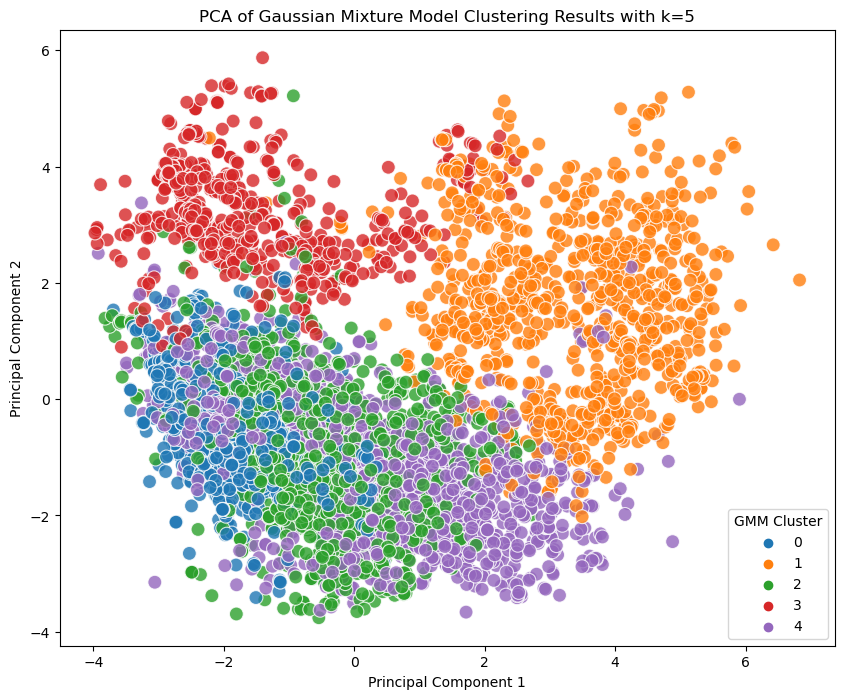

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=5, random_state=39)
gmm_labels = gmm.fit_predict(normalized_df)

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['GMM Cluster'] = gmm_labels

# Plotting PCA results with GMM clustering labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='GMM Cluster', 
                palette='tab10', data=pca_df, s=100, alpha=0.8)
plt.title('PCA of Gaussian Mixture Model Clustering Results with k=5')
plt.show()


### 8.1.1 Key observations;

- The graph displays data points projected onto the second principal components.
- There are five groups, each indicated by a color.
- Principal Component 1 is shown on the x axis while Principal Component 2 is, on the y axis.
- Compared toother clustering methods, the clusters overlap more and are less clearly separated.
- The largest cluster, represented by orange (1) covers a portion of the side of the plot.
- The green (2) and purple (4) clusters are closer to the center. Overlap more.
- Both blue (0) and red (3) clusters are smaller. Concentrated in regions.

### 8.1.2. Analysis;

- From the PCA visualization it's evident that GMM has identified clusters of varying shapes and sizes.
- The substantial overlap among clusters indicates that GMM is making allocations of data points to different groups.
- The wide distribution of data, within the orange cluster suggests a range of data points sharing characteristics.

## 8.2. t-SNE Visualization of clustering results by the Gaussian Mixture Model (GMM) clustering
Visualize the results of Gaussian Mixture Model (GMM) clustering at K=5 using the dimensionality reduction algorithm t-SNE (t-Distributed Stochastic Neighbor Embedding). t-SNE is a dimension reduction algorithm to reduce high-dimensional data to two dimensions t-SNE is a dimensionality reduction algorithm to reduce high dimensional data to two dimensions.

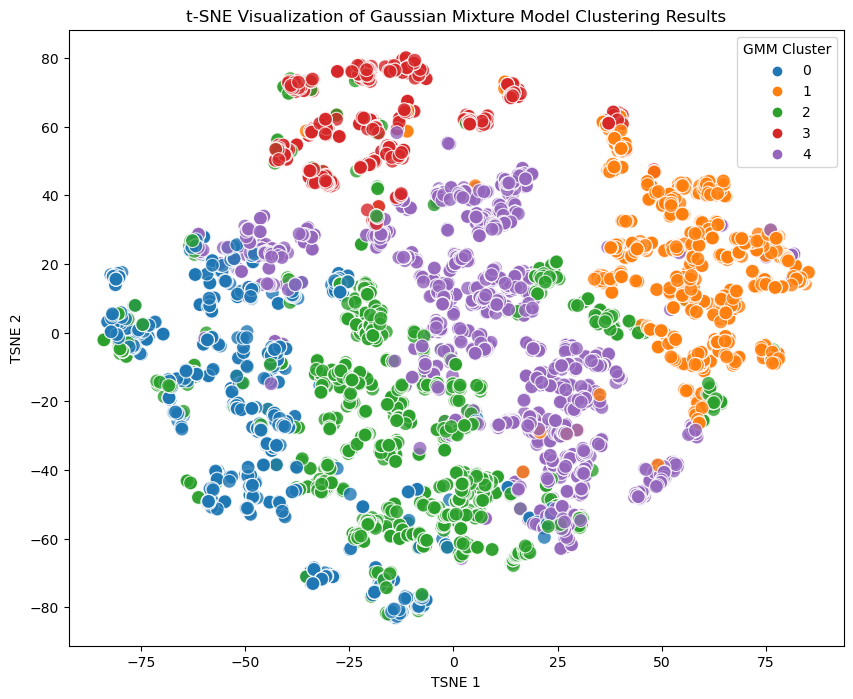

In [42]:
# Applying t-SNE to the normalized data for visualization of Gaussian Mixture Model clustering
tsne_results_gmm = TSNE(n_components=2, random_state=39).fit_transform(normalized_df)

# Adding t-SNE results to a new DataFrame for plotting GMM clustering labels
tsne_df_gmm = pd.DataFrame(tsne_results_gmm, columns=['TSNE 1', 'TSNE 2'])
tsne_df_gmm['GMM Cluster'] = gmm_labels

# Plotting the t-SNE results with GMM clustering labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE 1', y='TSNE 2', hue='GMM Cluster', 
                palette='tab10', data=tsne_df_gmm, s=100, alpha=0.8)
plt.title('t-SNE Visualization of Gaussian Mixture Model Clustering Results')
plt.show()


### 8.2.1. Key observations;

- The graph displays 5 clusters, which align with the PCA representation.
- Each cluster is assigned a color corresponding to the color scheme used in the PCA plot.
- The clusters exhibit distinctions compared to the PCA visualization.
- The orange cluster (1) remains the largest, forming a group, on the side of the plot.
- In this visualization the green (2) and purple (4) clusters appear scattered and intertwined.
- On the hand the blue (0) and red (3) clusters are tightly packed and confined to specific regions.

### 8.2.2. Analysis;

- Through t SNE analysis we observe a structure within the data that highlights clearer separations between certain clusters.
- The mixing of purple clusters implies some shared characteristics, between these groups.
- The compactness of red clusters signifies defined, distinct entities.

## 8.3 Summary of  Gaussian Mixture Model Clustering findings;

In analyzing the results of Gaussian Mixture Model Clustering I can draw insights;

- Soft Clustering Approach; The GMM methodology enables an approach, to clustering allowing data points to have probabilities of belonging to clusters. This is evident in the overlapping nature of clusters observed in the PCA plot.
- Diverse Cluster Shapes; GMM demonstrates the ability to capture clusters with varying shapes and orientations as seen in the shapes in both visualizations.
- Varying Cluster Sizes; The algorithm successfully identifies clusters of sizes with the orange cluster standing out as the largest and most diverse.
- Dimensionality Reduction Comparison; Contrasting t SNE visualization with PCA highlights separations between clusters emphasizing GMMs capability to capture non linear relationships within the data.
- Cluster Stability; Notably some clusters such as blue and red maintain structures across both visualizations indicating defined groupings.
- Complex Relationships; The intertwining of purple clusters in the t SNE plot hints at potentially overlapping characteristics that GMM effectively captures.
- Potential for Further Analysis; The probabilistic nature of GMM clustering allows for a nuanced examination of data points exhibiting features, from clusters.

Overall Gaussian Mixture Model clustering has efficiently organized the data into discrete. Potentially intersecting clusters, shedding light on user preference patterns within your dataset.
This technique comes in handy when working with data that doesn't have boundaries, between groups and when you aim to account for the uncertainty, in cluster assignments. These findings can be applied for marketing strategies, tailored recommendations or deeper exploration of user behavioral trends considering the probabilistic aspects of cluster assignments.

# 9. Evaluate and compare the clustering methods (K-Means, Hierarchical Clustering, Spectral Clustering, Gaussian Mixture Model)
I can use the Silhouette Score, which provides a measure of how similar an object is within its own cluster compared to other clusters. The Silhouette Score ranges from -1 to +1, where a high value indicates that the objects are well matched to their own cluster and poorly matched to neighboring clusters.

Let's calculate and compare the Silhouette Scores for each of the clustering methods you mentioned, all using k=5 and the same normalized_df dataset with random_state=39 for consistency in the initialization where applicable.

{'K-Means': 0.1506567604030455, 'Hierarchical': 0.11722860889115137, 'Spectral': 0.05743782921155207, 'GMM': 0.0850347872111336}


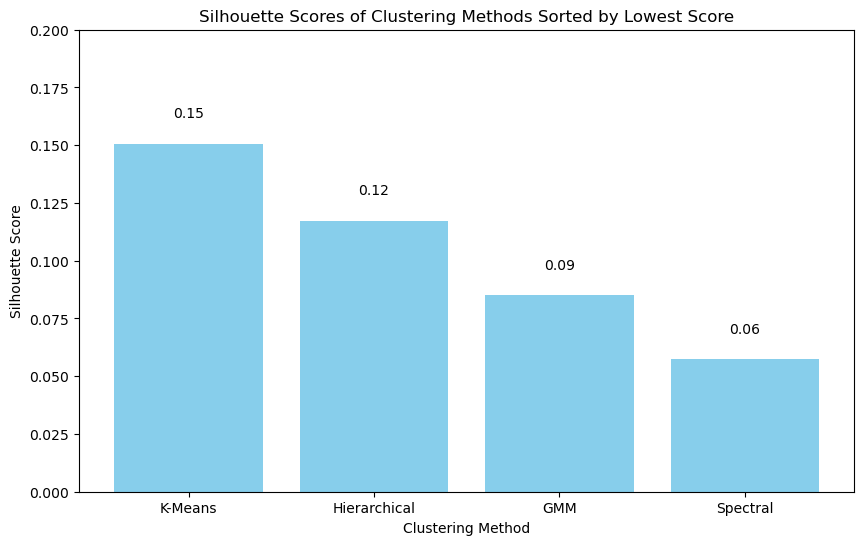

In [43]:
# Calculate and print silhouette scores
silhouette_scores = {
    'K-Means': silhouette_score(normalized_df, cluster_labels_final),
    'Hierarchical': silhouette_score(normalized_df, hierarchical_labels),
    'Spectral': silhouette_score(normalized_df, spectral_labels),
    'GMM': silhouette_score(normalized_df, gmm_labels)
}
print(silhouette_scores)

# Convert the dictionary to a DataFrame and sort by score
scores_df = pd.DataFrame(list(silhouette_scores.items()), columns=['Method', 'Score'])
sorted_scores_df = scores_df.sort_values(by='Score', ascending=False)  # Sort ascending

# Plotting the silhouette scores with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_scores_df['Method'], sorted_scores_df['Score'], color='skyblue')
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores of Clustering Methods Sorted by Lowest Score')

# Add the text annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, 0.2)  # Set the maximum y-axis limit to 0.2 as requested
plt.show()

The chart shows the silhouette scores of four different clustering methods: K-Means, Hierarchical, Gaussian Mixture Model (GMM), and Spectral. These scores are presented in a bar chart sorted from highest to lowest, providing a visual comparison of how effectively each clustering method has grouped the data.

## 9.1 Analysis of the Results:
- K-Means has the highest silhouette score at approximately 0.15. This indicates that, of the methods evaluated, K-Means has the best performance in terms of creating clusters where intra-cluster similarity is high relative to inter-cluster similarity.

- Hierarchical Clustering follows with a score of about 0.12, suggesting reasonably good cluster cohesion and separation but not as effective as K-Means.

- GMM comes next with a silhouette score around 0.09. This suggests moderate performance, where clusters are less distinct or compact compared to K-Means and Hierarchical clustering.

- Spectral Clustering shows the lowest score at approximately 0.06, indicating that the clusters formed by this method are relatively diffuse, with lower cohesion and separation compared to the other methods.

## 9.2 Evaluation:
- K-Means appears to be the most suitable method for this dataset under the conditions set (k=7 clusters) based on the silhouette scores. It manages to find more coherent and separate clusters than the other methods.

- Hierarchical Clustering also performs well and could be considered if the hierarchical structure of clusters is relevant for further analysis or if the domain-specific needs suggest a hierarchical interpretation of clusters.

- GMM and Spectral Clustering show lower performance according to the silhouette scores. This could be due to the nature of the data or possibly the need for tuning parameters more finely (e.g., the number of neighbors in Spectral Clustering or the covariance type in GMM).



## 9.2 Conclustion
**K-Means appears to be the most suitable method for this dataset.**


# 10. Visualize how each cluster ranks in terms of the frequency or importance of each category using K-Means, the best clustering in this data.
To visualize how each cluster ranks in terms of the frequency or importance of each category (like churches, resorts, beaches, etc.), I can create a series of visualizations that display the characteristics that define each cluster. This involves calculating the average ratings for each category within each cluster and then creating charts that highlight these averages, effectively showing what each cluster represents in terms of user preferences.

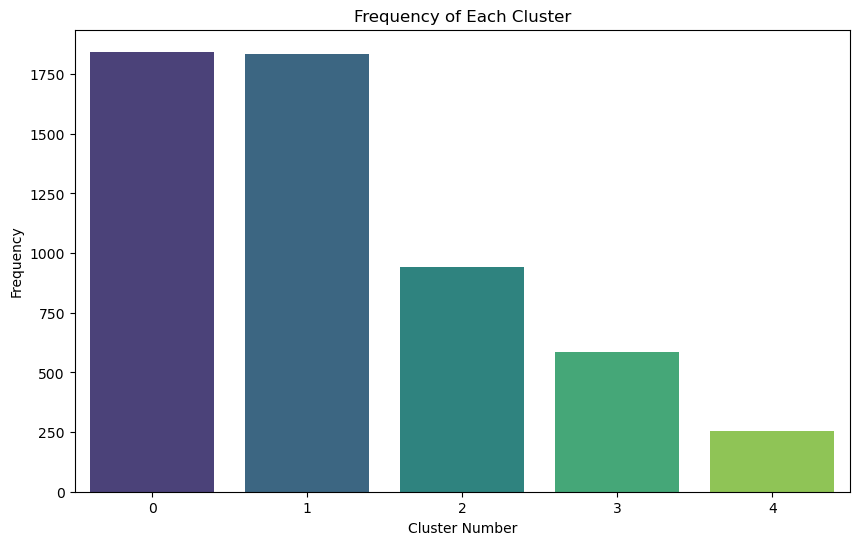

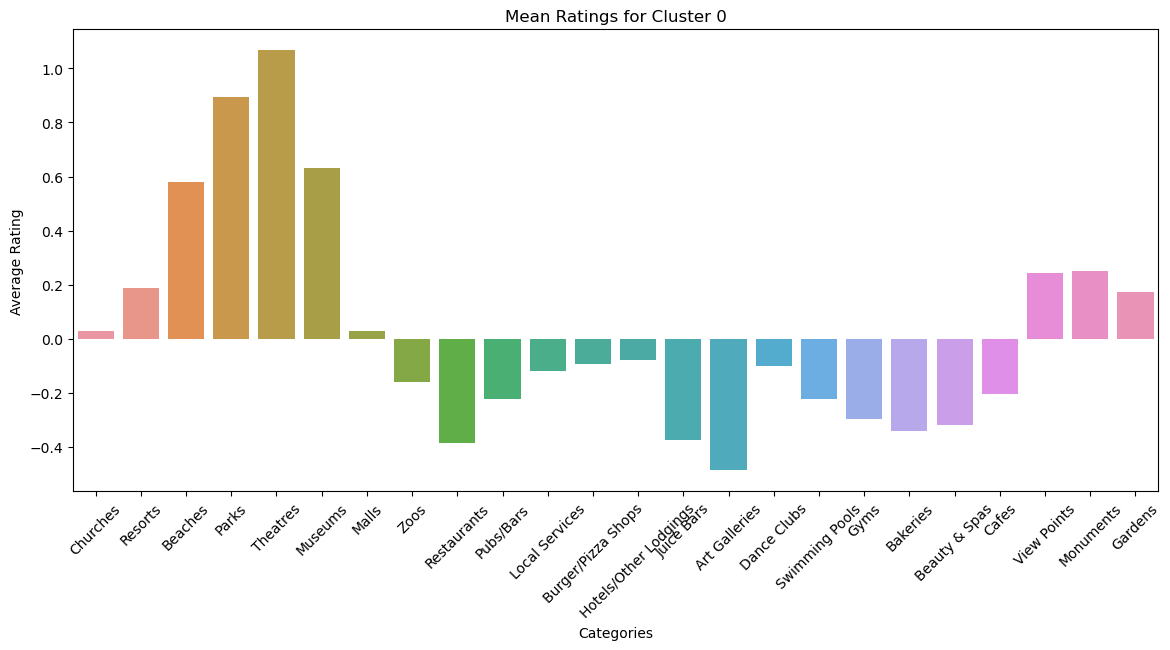

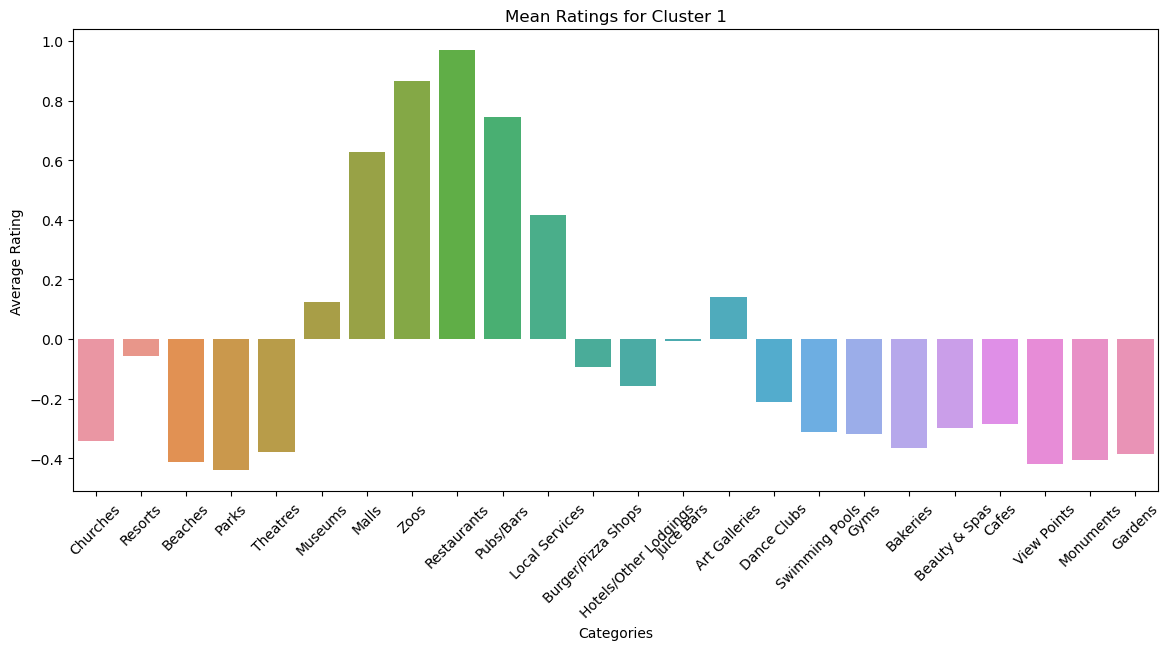

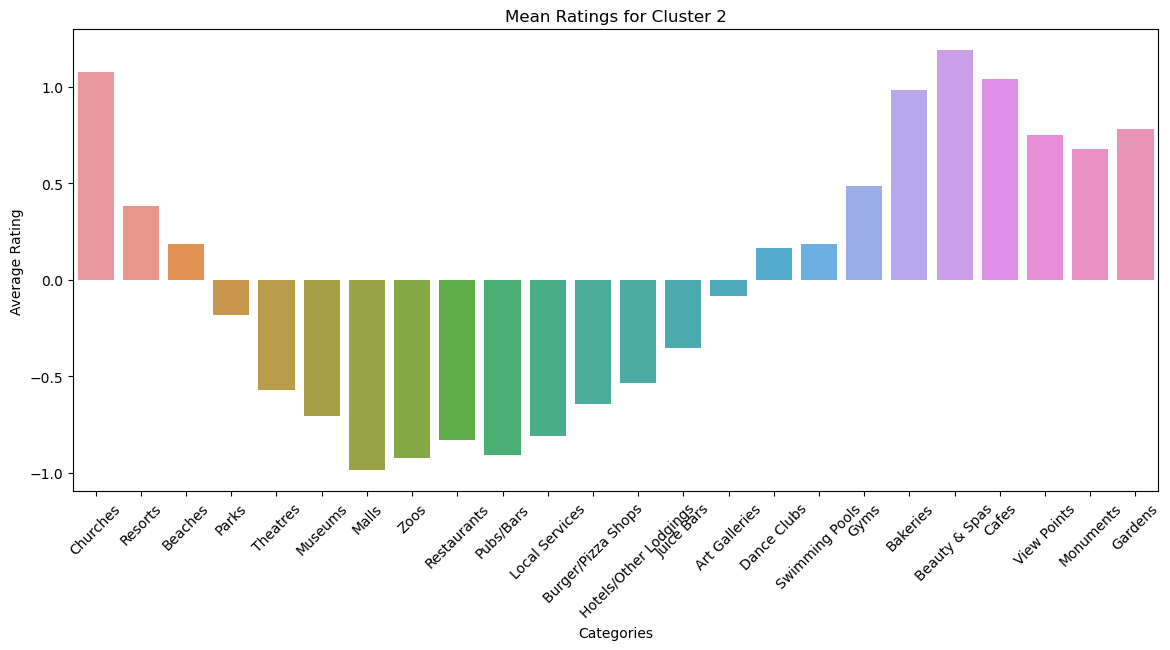

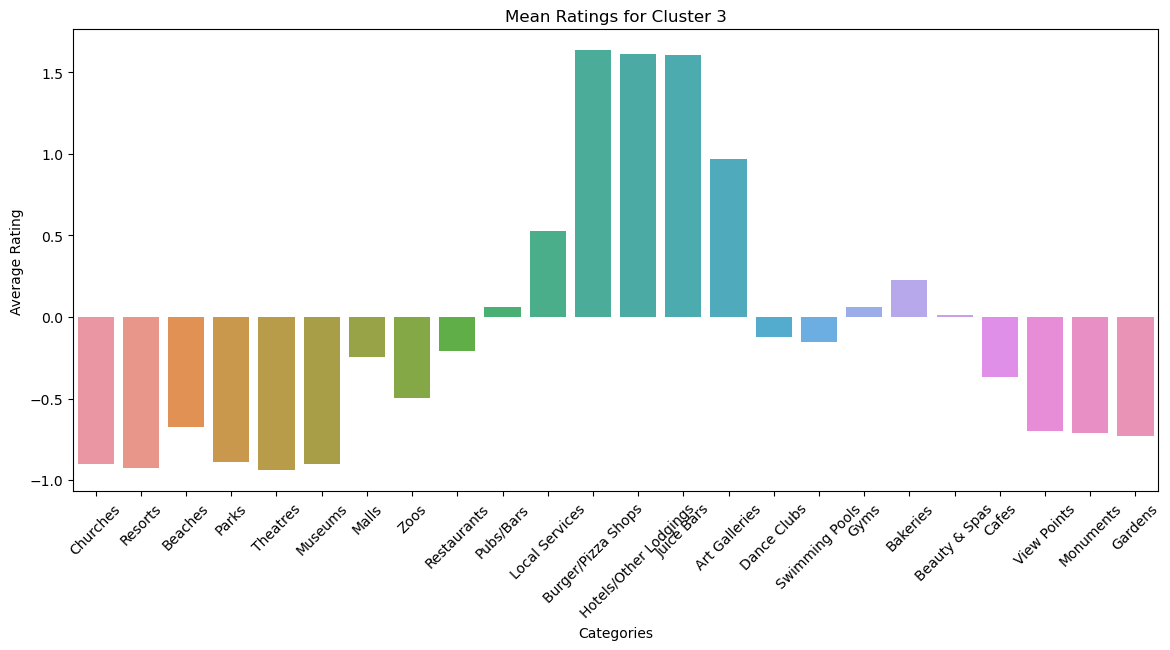

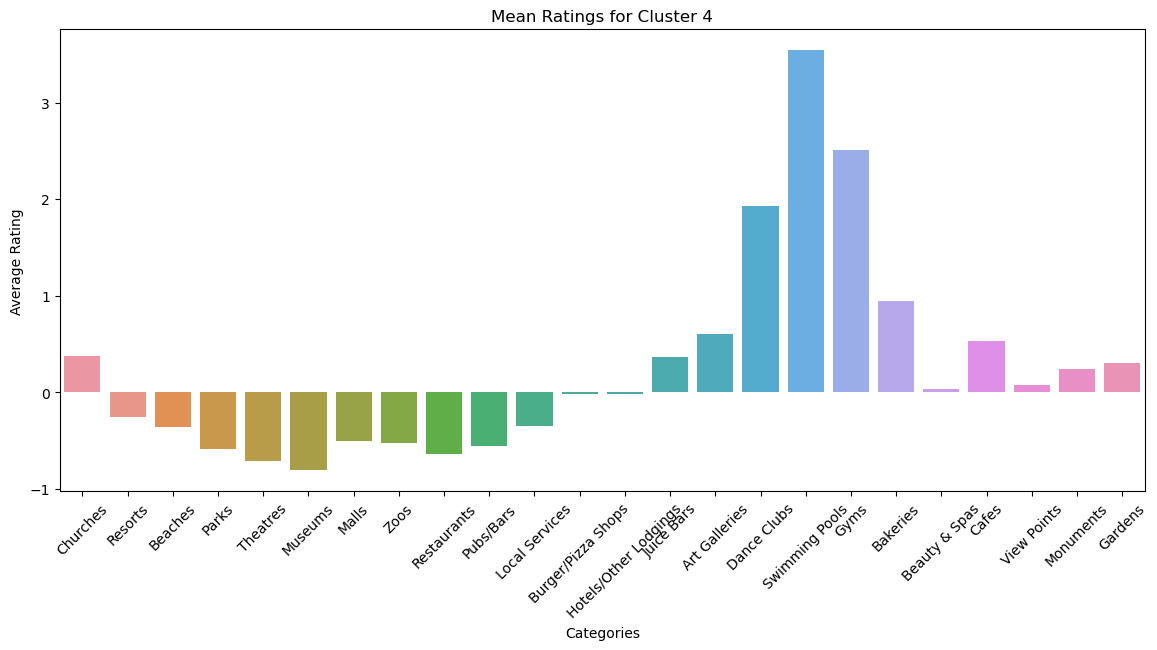

In [44]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Add cluster labels to the DataFrame for easy manipulation
normalized_df['Cluster'] = cluster_labels_final

# Calculate Mean Ratings for Each Category in Each Cluster
cluster_means = normalized_df.groupby('Cluster').mean()

# Calculate the frequency of each cluster
cluster_counts = normalized_df['Cluster'].value_counts().sort_index()

# Visualizing the frequencies of each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title('Frequency of Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Frequency')
plt.xticks(range(5))  # Ensure there are exactly five ticks one for each cluster
plt.show()


# Visualize Mean Ratings for Each Cluster

import matplotlib.pyplot as plt
import seaborn as sns

# Define category names for plotting
category_names = [
    "Churches", "Resorts", "Beaches", "Parks", "Theatres", "Museums",
    "Malls", "Zoos", "Restaurants", "Pubs/Bars", "Local Services", 
    "Burger/Pizza Shops", "Hotels/Other Lodgings", "Juice Bars", 
    "Art Galleries", "Dance Clubs", "Swimming Pools", "Gyms", 
    "Bakeries", "Beauty & Spas", "Cafes", "View Points", 
    "Monuments", "Gardens"
]

# Plotting
for i in range(5):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=category_names, y=cluster_means.iloc[i].values)
    plt.xticks(rotation=45)
    plt.title(f'Mean Ratings for Cluster {i}')
    plt.ylabel('Average Rating')
    plt.xlabel('Categories')
    plt.show()

## 10.1. General Observations:
- Each chart corresponds to one of the five clusters.
- The x-axis represents different categories such as churches, beaches, theatres, etc.
- The y-axis shows the mean ratings, which appear to have been normalized (some values are negative, indicating mean subtraction or similar standardization during preprocessing).
- Each category is colored distinctly, which helps in distinguishing them across different clusters.
## 10.2. Analysis of Each Cluster:
### Cluster 0: Cultural and Outdoor Enthusiasts

- Highest ratings: Theaters, parks, museums
- Moderate ratings: Beaches, resorts, viewpoints
- Lowest ratings: Dance clubs, swimming pools, gyms
- This cluster represents travelers who prefer cultural activities and outdoor experiences, with less interest in nightlife or fitness-oriented activities.
### Cluster 1: Family-Friendly Nature Lovers

- Highest ratings: Restaurants, pubs/bars, zoos
- Moderate ratings: Malls, local services
- Lowest ratings: Churches, resorts, beaches
- This group seems to favor family-oriented activities and urban amenities, with a particular interest in dining out and animal-related attractions.
### Cluster 2: Urban Nightlife and Wellness Seekers

- Highest ratings: Beauty & spas, cafes, gyms
- Moderate ratings: Churches, dance clubs, swimming pools
- Lowest ratings: Museums, theaters, zoos
- This cluster shows a preference for urban lifestyle activities, wellness, and nightlife, with less interest in traditional tourist attractions.
### Cluster 3: Practical Urban Travelers

- Highest ratings: Burger/pizza shops, hotels/lodgings, local services
- Moderate ratings: Art galleries, gyms
- Lowest ratings: Churches, resorts, beaches
- This group appears to be focused on practical urban amenities, suggesting business travelers or those who prefer city conveniences.
### Cluster 4: Active Nightlife Enthusiasts

- Extremely high ratings: Swimming pools, gyms, Dance clubs,
- Moderate ratings: beauty & spas
- Low ratings across most other categories
- This cluster strongly prefers nightlife and fitness activities, showing little interest in other types of attractions or activities.

## 10.3. Insights and Strategic Implications:
- These clusters represent distinct traveler preferences, which can be used for targeted marketing, personalized recommendations, and strategic planning in the travel and hospitality industry.
- Targeted Marketing: Understanding these preferences allows for more targeted marketing strategies. For instance, promoting fitness memberships or events to Cluster 2, while highlighting cultural events or family packages to Cluster 0.
- Service Development: Knowing the preferences can help in service development or enhancements. For Cluster 0, improving cafe environments or spa services could be beneficial.
- Personalization: Online platforms can tailor their recommendations to better suit the lifestyle preferences of each cluster, enhancing user satisfaction and engagement.


## 11. Creating Word Clouds for Each Cluster using K-Means, the best clustering in this data.
Word clouds can visually emphasize categories based on their average ratings within each cluster. The size of each word in the cloud will correspond to the average rating of that category, allowing us to quickly see which categories are most characteristic of each cluster.

In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


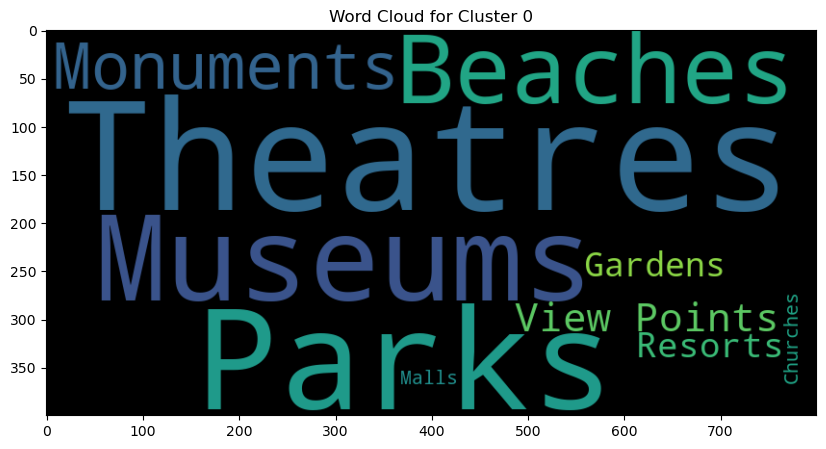

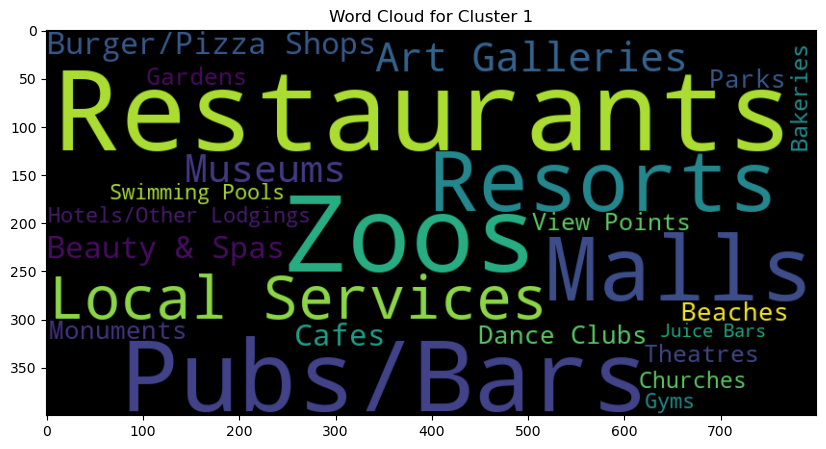

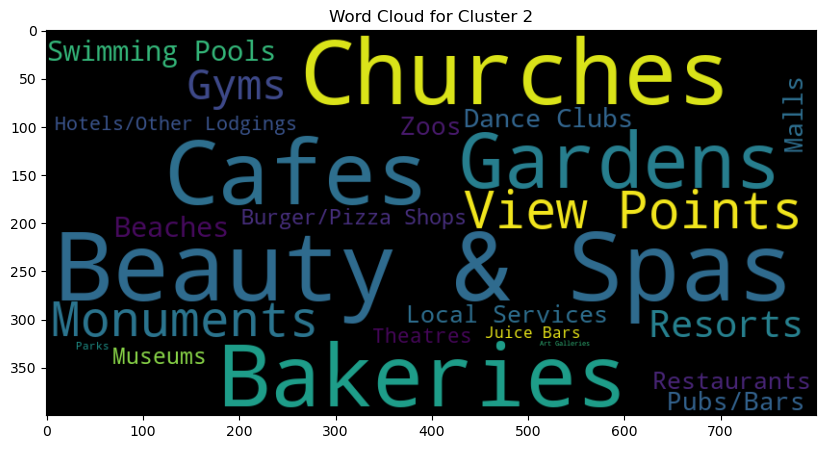

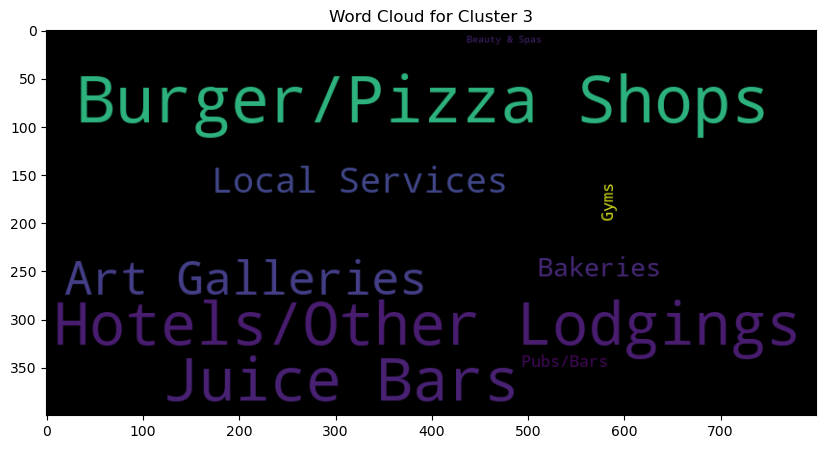

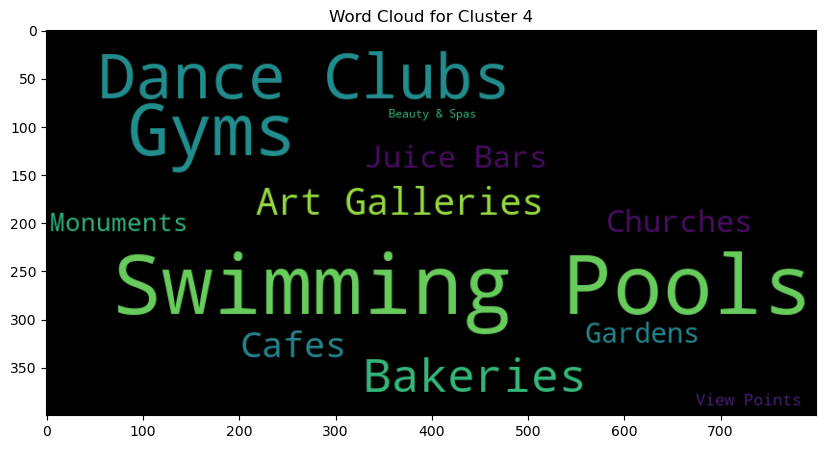

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


for i in range(5):
    cluster_ratings = cluster_means.iloc[i]
    word_freq = {name: cluster_ratings[j] for j, name in enumerate(category_names)}
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('on')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.show()


## 11.2. Analysis of Each Cluster:
The word clouds provided for each cluster from your K-Means clustering give a visual depiction of the categories that are most representative of each group, based on the average ratings. Here's an evaluation based on the observed word clouds for each cluster:

### Cluster 0: Cultural and Outdoor Enthusiasts
- Dominant features: Theatres, Parks, Museums, Beaches, Monuments
- This group shows a strong preference for cultural activities and outdoor attractions. They are likely interested in historical sites, arts, and nature.
### Cluster 1: Urban Family-Friendly Explorers
- Dominant features: Restaurants, Zoos, Malls, Pubs/Bars, Art Galleries
- This cluster appears to favor a mix of family-friendly activities (zoos, malls) and urban dining experiences. They also show interest in art and nightlife.
### Cluster 2: Wellness and Leisure Seekers
- Dominant features: Churches, Cafes, Beauty & Spas, Bakeries, Gardens
- This group seems to prioritize relaxation, wellness, and possibly spiritual activities. They show a preference for calm, leisurely experiences.
### Cluster 3: Practical Urban Travelers
- Dominant features: Burger/Pizza Shops, Hotels/Other Lodgings, Local Services, Art Galleries
- This cluster likely represents practical travelers, possibly business travelers or those who prefer urban conveniences and quick dining options.
### Cluster 4: Active Lifestyle and Nightlife Enthusiasts
- Dominant features: Dance Clubs, Gyms, Swimming Pools, Art Galleries
- This group strongly prefers active and social activities, with a focus on fitness and nightlife. They also show some interest in cultural experiences like art galleries.

## 11.2 Overall Evaluation
Interests; The clusters show a range of interests, including outdoor activities, cultural experiences, shopping, dining and fitness. This diversity can assist in tailoring marketing strategies and services to cater to the preferences of each cluster. Customized Approaches; Understanding these preferences enables businesses to develop targeted marketing campaigns. For example promoting park events to Cluster 0. Offering exclusive deals, on gym memberships and fitness classes to Cluster 4. Strategic Preparation; Service providers can plan their offerings based on the interests within each cluster. For instance a citys planning department could focus on enhancing park facilities for Cluster 0 while enhancing fitness amenities for Cluster 4. These visual representations effectively summarize the interests of each cluster simplifying data comprehension and visualization. They offer an insightful glimpse into the ratings data uncovering the interests, within each cluster that can influence decision making processes in business or urban planning scenarios.

# 12. Discussion:
In my discussion I applied the K Means clustering algorithm, with k=5 to a dataset containing user ratings for categories of attractions and activities. This method of learning helped us identify patterns in user preferences dividing the population into five groups with unique characteristics;

1. Cluster Identification and Characteristics: The analysis successfully identified five distinct clusters of users based on their travel preferences and ratings across various categories. Each cluster represents a unique group of travelers with specific interests:
   
  - Cultural and Outdoor Enthusiasts (Cluster 0): Prefer theatres, parks, museums, and beaches.
  - Urban Family-Friendly Explorers (Cluster 1): Favor restaurants, zoos, malls, and pubs/bars.
  - Wellness and Leisure Seekers (Cluster 2): Prioritize churches, cafes, beauty & spas, and gardens.
  - Practical Urban Travelers (Cluster 3): Focus on burger/pizza shops, hotels, and local services.
  - Active Lifestyle and Nightlife Enthusiasts (Cluster 4): Strongly prefer dance clubs, gyms, and swimming pools.

2. Clustering Method Comparison:
Among the four clustering methods applied (K-Means, Hierarchical, Spectral, and Gaussian Mixture Model), K-Means performed the best with the highest silhouette score of 0.15. This suggests that K-Means was most effective in creating cohesive and well-separated clusters for this dataset.
3. Visualization Techniques:
The use of various visualization techniques (PCA, t-SNE, dendrograms, and word clouds) provided complementary perspectives on the cluster characteristics. The word clouds, in particular, offered an intuitive and quick understanding of each cluster's preferences.
4. Data Insights:
The analysis revealed that travel preferences are multifaceted, with some users prioritizing cultural experiences, others focusing on family-friendly activities, and some preferring active nightlife. This diversity highlights the importance of personalized approaches in the travel and hospitality industry.

I assessed the clustering outcomes using silhouette scores which indicated that K Means performed better than methods, like Clustering,
Spectral Clustering,
and Gaussian Mixture Models.
K Means seemed to excel in identifying well defined clusters within the dataset.

# 13. Conclusions
## 13.1. Problem Solved:
The analysis aimed to segment users into distinct groups based on their preferences and ratings across different travel and leisure categories. This segmentation helps in understanding user behavior and can be used to tailor recommendations or marketing strategies in the travel industry.
## 13.2.  Unsupervised Learning Approach/Methodology:

1. Data Preprocessing: The dataset was cleaned and normalized to ensure fair comparisons across categories.
2. Unsupervised Learning: Several clustering algorithms were applied:

- K-Means
- Hierarchical Clustering
- Spectral Clustering
- Gaussian Mixture Model (GMM)


3. Evaluation Metric: Silhouette score was used to compare the performance of different clustering methods.
4. Dimensionality Reduction: PCA and t-SNE were used for visualization of high-dimensional data.

## 13.3. Results:

1. K-Means clustering with k=5 was identified as the best-performing method, achieving the highest silhouette score of 0.15.
2. Five distinct user clusters were identified:

- Cultural and Outdoor Enthusiasts: Prefer theaters, parks, museums, and beaches.
- Urban Family-Friendly Explorers: Favor restaurants, zoos, malls, and pubs/bars.
- Wellness and Leisure Seekers: Prioritize churches, cafes, beauty & spas, and gardens.
- Practical Urban Travelers: Focus on burger/pizza shops, hotels, and local services.
- Active Lifestyle and Nightlife Enthusiasts: Strongly prefer dance clubs, gyms, and swimming pools.


3. Visualizations using PCA, t-SNE, and word clouds provided intuitive representations of cluster characteristics.
4. The analysis revealed diverse travel preferences, highlighting the importance of personalized approaches in the travel and hospitality industry.

These results provide valuable insights for targeted marketing, product development, and personalization strategies in the travel sector, offering a data-driven approach to understanding and catering to different traveler segments.